# 2020-09-23_EcN_NOTgates_ALL_TFs_M9_ODnorm_replicate1

Brief experiment description:

* OD normalizing cells to minimize strain-to-strain growth differences
* Testing not gates in EcN for paper, replicate 1
* All strains are sequence confirmed

Experimental variables:
* Circuit landing pad repressor
    * determined by strain number
* Output landing pad repressor promoter
    * determined by strain number
* induction of YFP expression
    * determined by concentration of IPTG

Notes on experiment:

* FITC-A is the output channel (YFP)

### Strains

#### Experiment
| strain number | parent strain | repressor               |       inducer |
|---------------|---------------|-------------------------------|---------------|
| AJT303  | EcN | PsrA     |       P<sub>PsrA</sub> |
| AJT304  | EcN | HlyIIR_v6     |       P<sub>HlyIIR_V2</sub> |
| AJT305  | EcN | BM3R1     |       P<sub>BM3R1_v1</sub> |
| AJT306  | EcN | AmtR     |       P<sub>AmtR_v1</sub> |
| AJT307  | EcN | QacR     |       P<sub>QacR</sub> |
| AJT308  | EcN | LitR     |       P<sub>LitR</sub> |
| AJT309  | EcN | AmeR_v2     |       P<sub>AmeR_v1</sub> |
| AJT310  | EcN | IcaR_v3     |       P<sub>IcaR</sub> |
| AJT311  | EcN | BetI_v4     |       P<sub>BetI</sub> |
| AJT312  | EcN | PhlF_v3     |       P<sub>PhlF</sub> |

#### Controls
| parent_strain | description               |       strain number |
|---------------|------------|---------------------|
| EcN  | all landing pads, sensor integrated, others empty, abx included    |       AJT206 |
| EcN  | all landing pads, sensor + const. YFP on circuit, abx included      |       AJT280 |


### Protocol

 - Overnight in M9 + kan
 - M9
     * Dilute 1:150 in 500 uL deep-well plate, grow for 1.5 hours
     * Dilute to OD = 0.00006667 into 500 uL in deep-well plate with inducers, grow for 5 hours
         - dilution protocol was pretty solid
     * 100 uL culture into 200 uL PBS + kan

### Inducer concentrations

| Inducer |1|2|3|4|5|6|7|8| Promoter |
| --------|-|-|-|-|-|-|-|-|  ---------|
| IPTG |0|5|15|25|40|70|200| 1000 uM | P<sub>Tac</sub> |

In [1]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D

# Dan's custom scripts that aid in importing from conditions.csv file
sys.path.append('/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules')
import cf_imports
import cf_helpers

In [3]:
# Import reloads for when modules are being changed
import importlib
importlib.reload(cf_imports)
importlib.reload(cf_helpers)

<module 'cf_helpers' from '/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules/cf_helpers.py'>

## Data Import

In [4]:
# Provide full path to flow cytometry .fcs file directory and pass to fixer
fcs_dir = cf_imports.dir_fix(
    r'/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry Data/2020-09-23_EcN_NOTgates_ALL_TFs_M9_300minInduction_rep1/2020-09-23_EcN_NOTgates_AJT303-308_TFs_M9_rep1')
# Optional specification of conditions directory (default to same directory as data)
conds_dir = None

fcs_dir2 = cf_imports.dir_fix(
    r'/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry Data/2020-09-23_EcN_NOTgates_ALL_TFs_M9_300minInduction_rep1/2020-09-23_EcN_NOTgates_AJT309-312_TFs_rep1')
# Optional specification of conditions directory (default to same directory as data)
conds_dir2 = None



In [5]:
# Create experiment from fcs files and conditions file ()
exp = cf_imports.exp_from_dirs(fcs_dir, conds_dir)
exp2 = cf_imports.exp_from_dirs(fcs_dir2, conds_dir2)

['/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-23_EcN_NOTgates_ALL_TFs_M9_300minInduction_rep1/2020-09-23_EcN_NOTgates_AJT303-308_TFs_M9_rep1/Specimen_001_A1_A01.fcs',
 '/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-23_EcN_NOTgates_ALL_TFs_M9_300minInduction_rep1/2020-09-23_EcN_NOTgates_AJT303-308_TFs_M9_rep1/Specimen_001_A2_A02.fcs',
 '/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-23_EcN_NOTgates_ALL_TFs_M9_300minInduction_rep1/2020-09-23_EcN_NOTgates_AJT303-308_TFs_M9_rep1/Specimen_001_A3_A03.fcs',
 '/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-23_EcN_NOTgates_ALL_TFs_M9_300minInduction_rep1/2020-09-23_EcN_NOTgates_AJT303-308_TFs_M9_rep1/Specimen_001_A4_A04.fcs',
 '/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-23_EcN_NOTgates_ALL_TFs_M9_300minInd

['/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-23_EcN_NOTgates_ALL_TFs_M9_300minInduction_rep1/2020-09-23_EcN_NOTgates_AJT309-312_TFs_rep1/Specimen_001_A1_A01.fcs',
 '/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-23_EcN_NOTgates_ALL_TFs_M9_300minInduction_rep1/2020-09-23_EcN_NOTgates_AJT309-312_TFs_rep1/Specimen_001_A2_A02.fcs',
 '/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-23_EcN_NOTgates_ALL_TFs_M9_300minInduction_rep1/2020-09-23_EcN_NOTgates_AJT309-312_TFs_rep1/Specimen_001_A3_A03.fcs',
 '/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-23_EcN_NOTgates_ALL_TFs_M9_300minInduction_rep1/2020-09-23_EcN_NOTgates_AJT309-312_TFs_rep1/Specimen_001_A4_A04.fcs',
 '/Users/atriassi/Documents/MIT Dropbox (local)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2020-09-23_EcN_NOTgates_ALL_TFs_M9_300minInduction_rep1/

In [6]:
# Check dataframe 
exp.data.head(10)
# exp2.data.head(10)
# exp3.data.head(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num
0,17.670000,33.0,11354.669922,8156.0,30.340000,52.0,3.090000,36.0,36373.230469,34789.0,51.200001,1,0.0,M9,EcN,1,A,1,AJT206
1,110.669998,61.0,11840.520508,11281.0,-4.440000,42.0,-21.629999,26.0,28697.009766,28985.0,51.200001,1,0.0,M9,EcN,1,A,1,AJT206
2,15.810000,37.0,11228.270508,9352.0,-19.980000,47.0,133.899994,59.0,46281.449219,44488.0,51.299999,1,0.0,M9,EcN,1,A,1,AJT206
3,80.910004,52.0,8899.350586,5321.0,-27.380001,26.0,0.000000,51.0,29881.830078,27604.0,51.299999,1,0.0,M9,EcN,1,A,1,AJT206
4,13.950000,36.0,9306.990234,8953.0,-18.500000,38.0,42.230000,65.0,25521.060547,25566.0,51.400002,1,0.0,M9,EcN,1,A,1,AJT206
5,88.349998,58.0,11740.190430,9030.0,-13.320000,41.0,2.060000,45.0,37784.968750,34654.0,51.500000,1,0.0,M9,EcN,1,A,1,AJT206
6,73.470001,66.0,11362.570312,9435.0,-19.980000,33.0,7.210000,69.0,32237.519531,30150.0,51.500000,1,0.0,M9,EcN,1,A,1,AJT206
7,11.160000,80.0,3320.370117,2281.0,-0.740000,17.0,-59.739998,69.0,1115.070068,932.0,51.500000,1,0.0,M9,EcN,1,A,1,AJT206
8,8.370000,73.0,15994.340820,13829.0,-25.900000,38.0,17.510000,74.0,15193.410156,14729.0,51.599998,1,0.0,M9,EcN,1,A,1,AJT206
9,38.130001,65.0,2869.280029,2348.0,6.660000,22.0,-18.539999,34.0,1806.060059,1681.0,51.599998,1,0.0,M9,EcN,1,A,1,AJT206


In [7]:
exp.data.groupby(['parent_strain','strain_num', 'iptg']).size()
# exp2.data.groupby(['parent_strain','strain_num', 'iptg']).size()
# exp3.data.groupby(['parent_strain','strain_num', 'iptg']).size()

parent_strain  strain_num  iptg  
EcN            AJT306      0.0        56348
                           5.0        55803
                           15.0       56442
                           25.0       58463
                           40.0       60126
                           70.0       59675
                           200.0      58204
                           1000.0     56077
               AJT308      0.0        57167
                           5.0        56601
                           15.0       57237
                           25.0       38006
                           40.0       54371
                           70.0       53972
                           200.0      53619
                           1000.0     53884
               AJT304      0.0        72151
                           5.0        70750
                           15.0       68699
                           25.0       69493
                           40.0       69246
                           70.0       7038

## Gating

### FSC / SSC

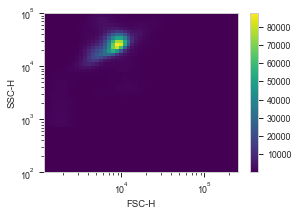

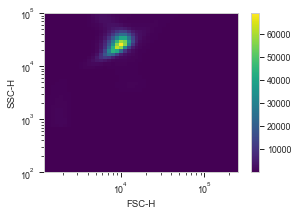

In [8]:
scatter = flow.DensityView(
    xchannel = "FSC-H",
    ychannel = "SSC-H",
    yscale = "log",
    xscale = "log")

scatter.plot(exp, ylim=(100,100000))
scatter.plot(exp2, ylim=(100,100000))

Gate FSC-A / SSC-A w/ Guassian w/ 2 sigma stddeviation

In [9]:
g2 = flow.PolygonOp(name = "Debris_Filter",
                    xchannel = "FSC-H",
                    ychannel = "SSC-H",
                    xscale = 'log',
                    yscale = 'log')

g2.vertices = [(4000, 10000), # bottom left
             (18000, 18000), # bottom right
             (18000, 55000), # top right
             (4000, 35000)] # top left

In [10]:
# for polygon gating as opposed to using Gaussian mixture model
exp_gated = g2.apply(exp)
exp2_gated = g2.apply(exp2)

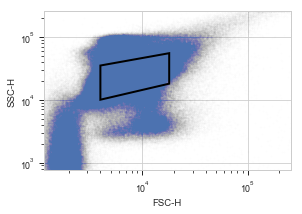

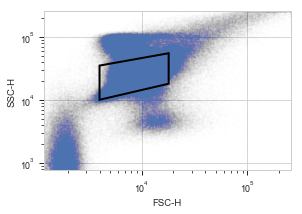

In [11]:
# takes a minute or two to run
g2.default_view().plot(exp_gated, alpha = 0.002)
g2.default_view().plot(exp2_gated, alpha = 0.002)

In [12]:
exp_gated.data.head(10)
# exp2_gated.data.head(10)
# exp3_gated.data.head(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num,Debris_Filter
0,17.670000,33.0,11354.669922,8156.0,30.340000,52.0,3.090000,36.0,36373.230469,34789.0,51.200001,1,0.0,M9,EcN,1,A,1,AJT206,True
1,110.669998,61.0,11840.520508,11281.0,-4.440000,42.0,-21.629999,26.0,28697.009766,28985.0,51.200001,1,0.0,M9,EcN,1,A,1,AJT206,True
2,15.810000,37.0,11228.270508,9352.0,-19.980000,47.0,133.899994,59.0,46281.449219,44488.0,51.299999,1,0.0,M9,EcN,1,A,1,AJT206,True
3,80.910004,52.0,8899.350586,5321.0,-27.380001,26.0,0.000000,51.0,29881.830078,27604.0,51.299999,1,0.0,M9,EcN,1,A,1,AJT206,True
4,13.950000,36.0,9306.990234,8953.0,-18.500000,38.0,42.230000,65.0,25521.060547,25566.0,51.400002,1,0.0,M9,EcN,1,A,1,AJT206,True
5,88.349998,58.0,11740.190430,9030.0,-13.320000,41.0,2.060000,45.0,37784.968750,34654.0,51.500000,1,0.0,M9,EcN,1,A,1,AJT206,True
6,73.470001,66.0,11362.570312,9435.0,-19.980000,33.0,7.210000,69.0,32237.519531,30150.0,51.500000,1,0.0,M9,EcN,1,A,1,AJT206,True
7,11.160000,80.0,3320.370117,2281.0,-0.740000,17.0,-59.739998,69.0,1115.070068,932.0,51.500000,1,0.0,M9,EcN,1,A,1,AJT206,False
8,8.370000,73.0,15994.340820,13829.0,-25.900000,38.0,17.510000,74.0,15193.410156,14729.0,51.599998,1,0.0,M9,EcN,1,A,1,AJT206,False
9,38.130001,65.0,2869.280029,2348.0,6.660000,22.0,-18.539999,34.0,1806.060059,1681.0,51.599998,1,0.0,M9,EcN,1,A,1,AJT206,False


In [14]:
# should use Debris_Filter_2 if using Gaussian Mixture Model, otherwise Debris_Filter
exp_gated.data.groupby(['Debris_Filter','parent_strain','strain_num', 'media', 'iptg']).size()
# exp2_gated.data.groupby(['Debris_Filter','parent_strain','strain_num', 'media', 'iptg']).size()

Debris_Filter  parent_strain  strain_num  media  iptg  
False          EcN            AJT306      M9     0.0         9872
                                                 5.0         8845
                                                 15.0        9296
                                                 25.0       11482
                                                 40.0       12961
                                                 70.0       12340
                                                 200.0      10828
                                                 1000.0      8599
                              AJT308      M9     0.0        10683
                                                 5.0         9840
                                                 15.0       10238
                                                 25.0        8756
                                                 40.0        6456
                                                 70.0        5794
                    

In [15]:
exp_gated_df = exp_gated.data
exp2_gated_df = exp2_gated.data

filtered  = pd.concat([exp_gated_df[(exp_gated_df['Debris_Filter']==True)&(exp_gated_df['strain_num']!='blank')] , 
                       exp2_gated_df[(exp2_gated_df['Debris_Filter']==True)&(exp2_gated_df['strain_num']!='blank')]])
#picked debris filter that looked best qualitatitvely and excluded blank wells

# filtered.head(10)
filtered.tail(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num,Debris_Filter
1875155,86.489998,51.0,10500.680664,10119.0,-4.440000,24.0,-79.309998,31.0,36875.429688,36004.0,1065.800049,7,1000.0,M9,EcN,1,H,63,AJT312,True
1875157,33.480000,104.0,10002.980469,10772.0,10.360001,44.0,-83.430000,37.0,27181.109375,26636.0,1065.900024,7,1000.0,M9,EcN,1,H,63,AJT312,True
1875158,83.699997,77.0,15147.459961,8961.0,-1.480000,19.0,3.090000,43.0,46942.679688,27849.0,1065.900024,7,1000.0,M9,EcN,1,H,63,AJT312,True
1875159,-42.779999,39.0,8370.839844,9898.0,22.200001,33.0,-86.519997,17.0,23046.330078,23034.0,1065.900024,7,1000.0,M9,EcN,1,H,63,AJT312,True
1875160,-94.860001,56.0,9383.620117,10404.0,34.779999,36.0,-86.519997,32.0,21825.240234,21584.0,1065.900024,7,1000.0,M9,EcN,1,H,63,AJT312,True
1875161,175.770004,100.0,27966.791016,16941.0,34.040001,32.0,-74.159996,48.0,69537.031250,43648.0,1065.900024,7,1000.0,M9,EcN,1,H,63,AJT312,True
1875162,16.740000,82.0,6883.270020,7039.0,-10.360001,22.0,-72.099998,34.0,26538.480469,25938.0,1065.900024,7,1000.0,M9,EcN,1,H,63,AJT312,True
1875163,106.950005,86.0,8667.089844,9318.0,14.800000,45.0,-116.389999,30.0,26478.960938,25521.0,1065.900024,7,1000.0,M9,EcN,1,H,63,AJT312,True
1875164,111.599998,77.0,14364.570312,14081.0,-20.720001,25.0,87.549995,68.0,38379.242188,37549.0,1065.900024,7,1000.0,M9,EcN,1,H,63,AJT312,True
1875165,-86.489998,61.0,8042.200195,8737.0,-38.480000,17.0,-81.369995,29.0,20653.439453,20789.0,1066.000000,7,1000.0,M9,EcN,1,H,63,AJT312,True


# Start from here

In [16]:
## pickle allows you to save an object as binary so it can be re-opened next time without re-running
## all of the code that loaded it

pickle.dump(exp_gated_df, open("pickledata_gated.p", "wb")) # wb is for writing binary
# exp_gated_df = pickle.load(open("pickledata_gated.p", "rb")) # rb is for reading binary

pickle.dump(exp2_gated_df, open("pickledata2_gated.p", "wb")) # wb is for writing binary
# exp2_gated_df = pickle.load(open("pickledata2_gated.p", "rb")) # rb is for reading binary

pickle.dump(filtered, open("pickledata_filtered.p", "wb")) # wb is for writing binary
# filtered = pickle.load(open("pickledata_filtered.p", "rb")) # rb is for reading binary

## Calculating Medians

In [17]:
parent = sorted(filtered['parent_strain'].unique()) # get strain numbers in experiment
print(parent)

['EcN']


In [18]:
strains = sorted(filtered['strain_num'].unique()) # get strain numbers in experiment
print(strains)

['AJT206', 'AJT280', 'AJT303', 'AJT304', 'AJT305', 'AJT306', 'AJT308', 'AJT309', 'AJT310', 'AJT311', 'AJT312']


In [19]:
media = sorted(filtered['media'].unique()) # get media used in experiment
print(media)

['M9']


In [20]:
# SPECIFY INDUCERS USED IN THIS EXPERIMENT 
# can't get this from conditions.csv because did them as columns with float values instead of having 
# an inducer name column, which helps deal with situations where multiple inducers are added to same well
inducers = ['iptg'] 

starting_conc = {'iptg': [1]}

inducer_info = {'iptg': {'color': '#fbb03b', # color same as from Adam's paper
                        'conc': sorted(filtered['iptg'].unique()), # get concentrations for atc
                        'plot_conc': starting_conc['iptg'] + sorted(filtered['iptg'].unique())[1:]}} # make starting concentration not 0

print(inducer_info['iptg']['plot_conc'])
# print(inducer_info)

[1, 5.0, 15.0, 25.0, 40.0, 70.0, 200.0, 1000.0]


In [22]:
# inducer_info_iptg_8_v2 = inducer_info['iptg']

# %store inducer_info_iptg_8_v2

Stored 'inducer_info_iptg_8_v2' (dict)


In [21]:
data_dict = dict() # initiate dictionary
controls_dict = dict() 

# make giant nested dictionary with medians in it for each condition (media, inducer, concentration, strain)
for m in media:
    data_dict[m] = dict()
    controls_dict[m] = dict() # don't include inducer as index since controls don't see inducer
    for i in inducers:
        data_dict[m][i] = dict()
        for p in parent:
            data_dict[m][i][p] = dict()
            controls_dict[m][p] = dict()

            ## grabbing control values for each well of control strain
            for cs in ['AJT206','AJT280']:
                controls_dict[m][p][cs] = dict()
               
                if cs == 'AJT206':
                    well_row = ['A','B','C','D']
                elif cs == 'AJT280':
                    well_row = ['E','F','G','H']
                    
                for w in well_row:
                
                    q = filtered.query('media == "{}"'.format(m) 
    #                                    + ' and ' + 'parent_strain == "{}"'.format(p)
                                       + ' and ' +  'strain_num == "{}"'.format(cs)
                                       + ' and ' + 'row == "{}"'.format(w))
                    controls_dict[m][p][cs][w] = q['FITC-A'].median()
        
        # since not all strains were induced with all inducers (e.g. Pvan was never induced with iptg), 
        # making separate strain lists for each inducer; otherwise, there will be an error that the strain 
        # with inducer condition !=0 doesn't exist (that's my guess anyways)

        # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if (len(filtered[filtered['strain_num']==s][i].unique())>1 and
                                                     s in filtered[filtered['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later

            for c in inducer_info[i]['conc']:
                data_dict[m][i][p][c] = dict()
                for s in strains_subset:
                    q = filtered.query('media == "{}"'.format(m) 
                                       + ' and ' + '{} == {}'.format(i, c)
#                                        + ' and ' + 'parent_strain == "{}"'.format(p)
                                       + ' and ' +  'strain_num == "{}"'.format(s))
                    data_dict[m][i][p][c][s] = q['FITC-A'].median()

# make dictionary of dataframes beacuse dataframes look nicer
data = dict()
controls = dict()

for m in media:
    data[m] = dict()
    controls[m] = dict()
    for i in inducers:
        data[m][i] = dict()
        for p in parent:
            data[m][i][p] = pd.DataFrame.from_dict(data_dict[m][i][p])
            controls[m][p] = pd.DataFrame.from_dict(controls_dict[m][p])
        
# data['M9']['ohc14']

In [9]:
# pickle.dump(data, open("data.p", "wb")) # wb is for writing binary

In [22]:
controls['M9']['EcN']

,AJT206,AJT280
A,26.969999,NaN
B,26.040001,NaN
C,25.110001,NaN
D,25.110001,NaN
E,NaN,935.580017
F,NaN,924.419983
G,NaN,914.190002
H,NaN,927.210022


In [23]:
# controls['M9']['EcN'].loc[[~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])],'AJT206']
print(controls['M9']['EcN'].loc[:,'AJT206'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])])
auto = (controls['M9']['EcN'].loc[:,'AJT206'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])]).mean(axis=0)


print(controls['M9']['EcN'].loc[:,'AJT280'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT280'])])
RPUg = (controls['M9']['EcN'].loc[:,'AJT280'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT280'])]).mean(axis=0)

print()
print(auto)
print(RPUg)

A    26.969999
B    26.040001
C    25.110001
D    25.110001
Name: AJT206, dtype: float64
E    935.580017
F    924.419983
G    914.190002
H    927.210022
Name: AJT280, dtype: float64

25.80750036239624
925.3500061035156


In [24]:
# AJT206_NOTgates_r1_store = auto
# AJT280_NOTgates_r1_store = RPUg

# %store AJT206_NOTgates_r1_store
# %store AJT280_NOTgates_r1_store

Stored 'AJT206_NOTgates_r1_store' (float)
Stored 'AJT280_NOTgates_r1_store' (float)


In [25]:
data['M9']['iptg']['EcN']

,0.0,5.0,15.0,25.0,40.0,70.0,200.0,1000.0
AJT303,11758.919922,11549.669922,10995.389648,3714.419922,929.070007,545.910034,369.209991,279.929993
AJT304,3373.110107,3314.520020,3241.050049,3194.085083,2935.080078,1270.380005,376.649994,146.009995
AJT305,726.330017,712.380005,677.039978,267.839996,66.959999,45.570000,36.270000,32.549999
AJT306,2922.989990,2788.140137,2298.959961,652.859985,183.210007,123.690002,92.070000,79.050003
AJT308,11985.839844,11837.969727,10662.450195,3423.330078,684.479980,342.239990,209.250000,172.050003
AJT309,3807.885010,3702.330078,3246.630127,1379.655029,203.669998,108.809998,79.050003,67.889999
AJT310,2537.969971,2496.120117,2182.709961,603.570007,174.839996,102.300003,64.169998,47.430000
AJT311,6637.410156,6627.180176,6621.600098,6225.885010,4948.530273,3911.580078,2828.130127,2235.719971
AJT312,10532.250000,10418.790039,10194.660156,1773.510010,103.230003,53.939999,39.990002,38.130001


In [26]:
# AJT303_ODnorm_r1_au_store = data['M9']['iptg']['EcN'].loc['AJT303']
# AJT304_ODnorm_r1_au_store = data['M9']['iptg']['EcN'].loc['AJT304']
# AJT305_ODnorm_r1_au_store = data['M9']['iptg']['EcN'].loc['AJT305']
# AJT306_ODnorm_r1_au_store = data['M9']['iptg']['EcN'].loc['AJT306']
# AJT308_ODnorm_r1_au_store = data['M9']['iptg']['EcN'].loc['AJT308']
# AJT309_ODnorm_r1_au_store = data['M9']['iptg']['EcN'].loc['AJT309']
# AJT310_ODnorm_r1_au_store = data['M9']['iptg']['EcN'].loc['AJT310']
# AJT311_ODnorm_r1_au_store = data['M9']['iptg']['EcN'].loc['AJT311']
# AJT312_ODnorm_r1_au_store = data['M9']['iptg']['EcN'].loc['AJT312']

# %store AJT303_ODnorm_r1_au_store
# %store AJT304_ODnorm_r1_au_store
# %store AJT305_ODnorm_r1_au_store
# %store AJT306_ODnorm_r1_au_store
# %store AJT308_ODnorm_r1_au_store
# %store AJT309_ODnorm_r1_au_store
# %store AJT310_ODnorm_r1_au_store
# %store AJT311_ODnorm_r1_au_store
# %store AJT312_ODnorm_r1_au_store

Stored 'AJT303_ODnorm_r1_au_store' (Series)
Stored 'AJT304_ODnorm_r1_au_store' (Series)
Stored 'AJT305_ODnorm_r1_au_store' (Series)
Stored 'AJT306_ODnorm_r1_au_store' (Series)
Stored 'AJT308_ODnorm_r1_au_store' (Series)
Stored 'AJT309_ODnorm_r1_au_store' (Series)
Stored 'AJT310_ODnorm_r1_au_store' (Series)
Stored 'AJT311_ODnorm_r1_au_store' (Series)
Stored 'AJT312_ODnorm_r1_au_store' (Series)


In [24]:
# dictionary with strain information that can be copied from experiment to experiment
strain_info = dict([('AJT206', {'color': 'k', 
                                'promoter': 'none',
                                'inducer': 'none'}), 
                      ('AJT280',{'color': 'k', 
                                 'promoter': 'RPU',
                                'inducer': 'none'}),
                      ('AJT269',{'color': '#fbb03b', 
                                 'promoter': '$P_{Tac}$',
                                'inducer': 'iptg'}),
                      ('AJT270',{'color': '#016837', 
                                 'promoter': '$P_{BAD_{mc1}}$',
                                'inducer': 'ara'}),
                      ('AJT271',{'color': '#016837', 
                                 'promoter': '$P_{BAD_{mc}}$',
                                'inducer': 'ara'}),
                      ('AJT272',{'color': '#00ffff', 
                                 'promoter': '$P_{Tet_{D18}}$',
                                'inducer': 'aTc'}),
                      ('AJT273',{'color': '#00ffff', 
                                 'promoter': '$P_{Tet_{Org}}$',
                                'inducer': 'aTc'}),
                      ('AJT274',{'color': '#0071bb', 
                                'promoter': '$P_{Ttg_{v1}}$',
                                 'inducer': 'nar'}),
                      ('AJT275',{'color': '#00b4ff', 
                                'promoter': '$P_{Cin}$',
                                'inducer': 'ohc14'}),
                      ('AJT276',{'color': '#ff00ff', 
                                 'promoter': '$P_{Van_{v2}}$',
                                'inducer': 'van'}),
                      ('AJT277',{'color': '#ff0000', 
                                'promoter': '$P_{CymRC_{v1}}$',
                                'inducer': 'cuma'}),
                      ('AJT278',{'color': '#ff0000', 
                                 'promoter': '$P_{CymRC_{v2}}$',
                                'inducer': 'cuma'}),
                      ('AJT279',{'color': '#ff00ff', 
                                 'promoter': '$P_{Van_{v1}}$',
                                'inducer': 'van'}),
                    # ^ parent = EcN -------------below parent = AJT209
                      ('AJT361',{'color': 'k', 
                                 'promoter': 'none',
                                'inducer': 'none'}),
                      ('AJT374',{'color': 'k',
                                'promoter': 'none',
                                'inducer':'none'}),
                      ('AJT367',{'color': '#fbb03b', 
                                 'promoter': '$P_{Tac}$',
                                'inducer': 'iptg'}),
                      ('AJT368',{'color': '#016837', 
                                 'promoter': '$P_{BAD_{mc1}}$',
                                'inducer': 'ara'}),
                      ('AJT369',{'color': '#00ffff', 
                                 'promoter': '$P_{Tet_{Org}}$',
                                'inducer': 'aTc'}),
                      ('AJT370',{'color': '#0071bb', 
                                'promoter': '$P_{Ttg_{v1}}$',
                                 'inducer': 'nar'}),
                      ('AJT371',{'color': '#00b4ff', 
                                'promoter': '$P_{Cin}$',
                                'inducer': 'ohc14'}),
                      ('AJT372',{'color': '#ff00ff', 
                                 'promoter': '$P_{Van_{v2}}$',
                                'inducer': 'van'}),
                      ('AJT373',{'color': '#ff0000', 
                                 'promoter': '$P_{CymRC_{v2}}$',
                                'inducer': 'cuma'}),

                    # ^ parent = AJT209 -------------below parent = AJT207
                      ('AJT362',{'color': 'k', 
                                 'promoter': 'none',
                                'inducer': 'none'}),
                      ('AJT382',{'color': 'k',
                                'promoter': 'none',
                                'inducer':'none'}),
                      ('AJT375',{'color': '#fbb03b', 
                                 'promoter': '$P_{Tac}$',
                                'inducer': 'iptg'}),
                      ('AJT376',{'color': '#016837', 
                                 'promoter': '$P_{BAD_{mc1}}$',
                                'inducer': 'ara'}),
                      ('AJT377',{'color': '#00ffff', 
                                 'promoter': '$P_{Tet_{Org}}$',
                                'inducer': 'aTc'}),
                      ('AJT378',{'color': '#0071bb', 
                                'promoter': '$P_{Ttg_{v1}}$',
                                 'inducer': 'nar'}),
                      ('AJT379',{'color': '#00b4ff', 
                                'promoter': '$P_{Cin}$',
                                'inducer': 'ohc14'}),
                      ('AJT380',{'color': '#ff00ff', 
                                 'promoter': '$P_{Van_{v2}}$',
                                'inducer': 'van'}),
                      ('AJT381',{'color': '#ff0000', 
                                 'promoter': '$P_{CymRC_{v2}}$',
                                'inducer': 'cuma'}),                    
                   ])

# print(strain_info['AJT275']['promoter'])

# promoters =[]
# for s in strains : # excludes AJT206 and AJT280; could do this a better way than by using these indexes
#     promoters.append(strain_info[s]['promoter'])
    
# print(promoters)

In [23]:
# dictionary with strain information that can be copied from experiment to experiment

# PsrA = '#d33dc1'
# HlyIIR = '#d2aa85'
# B3BM3R1 = '#44a8c3'
# AmtR = '#32a87c'
# QacR = '#c83832'
# LitR = '#f79a7a'
# AmeR = '#fd4131'
# IcaR = '#6a86c5'
# BetI = '#960985'
# PhlF = '#7bc229'

strain_info_rep = dict([
    ('AJT206', {'color': 'k',
                'repressor': 'none'}),
    ('AJT280',{'color': 'k',
               'repressor': 'RPU'}),
    ('AJT303',{'color': '#d33dc1',
               'repressor': 'PsrA'}),
    ('AJT304',{'color': '#d2aa85',
               'repressor': 'HlyIIR'}),
    ('AJT305',{'color': '#44a8c3',
               'repressor': 'BM3R1'}),
    ('AJT306',{'color': '#32a87c',
               'repressor': 'AmtR'}),
    ('AJT307',{'color': '#c83832',
               'repressor': 'QacR'}),
    ('AJT308',{'color': '#f79a7a',
               'repressor': 'LitR'}),
    ('AJT309',{'color': '#fd4131',
               'repressor': 'AmeR'}),
    ('AJT310',{'color': '#6a86c5',
               'repressor': 'IcaR'}),
    ('AJT311',{'color': '#960985',
               'repressor': 'BetI'}),
    ('AJT312',{'color': '#7bc229',
               'repressor': 'PhlF'}),
    ('AJT344', {'color': '#6a86c5',
               'repressor': 'IcaR'}),
    ('AJT269',{'color': '#fbb03b',
               'repressor': '$P_{Tac}$'}),
    
    ('AJT361', {'color': 'k',
                'repressor': 'none'}),
    ('AJT374',{'color': 'k',
               'repressor': 'RPU'}),
    ('AJT397',{'color': '#d33dc1',
               'repressor': 'PsrA'}),
    ('AJT398',{'color': '#d2aa85',
               'repressor': 'HlyIIR'}),
    ('AJT399',{'color': '#44a8c3',
               'repressor': 'BM3R1'}),
    ('AJT400',{'color': '#32a87c',
               'repressor': 'AmtR'}),
    ('AJT401',{'color': '#c83832',
               'repressor': 'QacR'}),
    ('AJT402',{'color': '#f79a7a',
               'repressor': 'LitR'}),
    ('AJT403',{'color': '#fd4131',
               'repressor': 'AmeR'}),
    ('AJT404',{'color': '#6a86c5',
               'repressor': 'IcaR'}),
    ('AJT405',{'color': '#960985',
               'repressor': 'BetI'}),
    ('AJT406',{'color': '#7bc229',
               'repressor': 'PhlF'}),
    ('AJT367',{'color': '#fbb03b',
               'repressor': '$P_{Tac}$'})
])

In [24]:
fig_pos = dict()

for m in media:
    fig_pos[m] = dict()
    strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']
    for s in strains_subset:
        fig_pos[m][s] = {'fig_row': strains_subset.index(s)//3, 'fig_col': strains_subset.index(s)-(3*(strains_subset.index(s)//3))}

fig_pos

{'M9': {'AJT303': {'fig_row': 0, 'fig_col': 0},
  'AJT304': {'fig_row': 0, 'fig_col': 1},
  'AJT305': {'fig_row': 0, 'fig_col': 2},
  'AJT306': {'fig_row': 1, 'fig_col': 0},
  'AJT308': {'fig_row': 1, 'fig_col': 1},
  'AJT309': {'fig_row': 1, 'fig_col': 2},
  'AJT310': {'fig_row': 2, 'fig_col': 0},
  'AJT311': {'fig_row': 2, 'fig_col': 1},
  'AJT312': {'fig_row': 2, 'fig_col': 2}}}

## Plot transfer function (no autofluorescence subtracted)

In [25]:
# Jai's fancy script that contains a class that builds transfer functions
## path for it in terminal open -a Sublime\ Text transferfunction.py

%load_ext autoreload
# %autoreload # to make sure that it reloads properly when this is run
from transferfunction import *

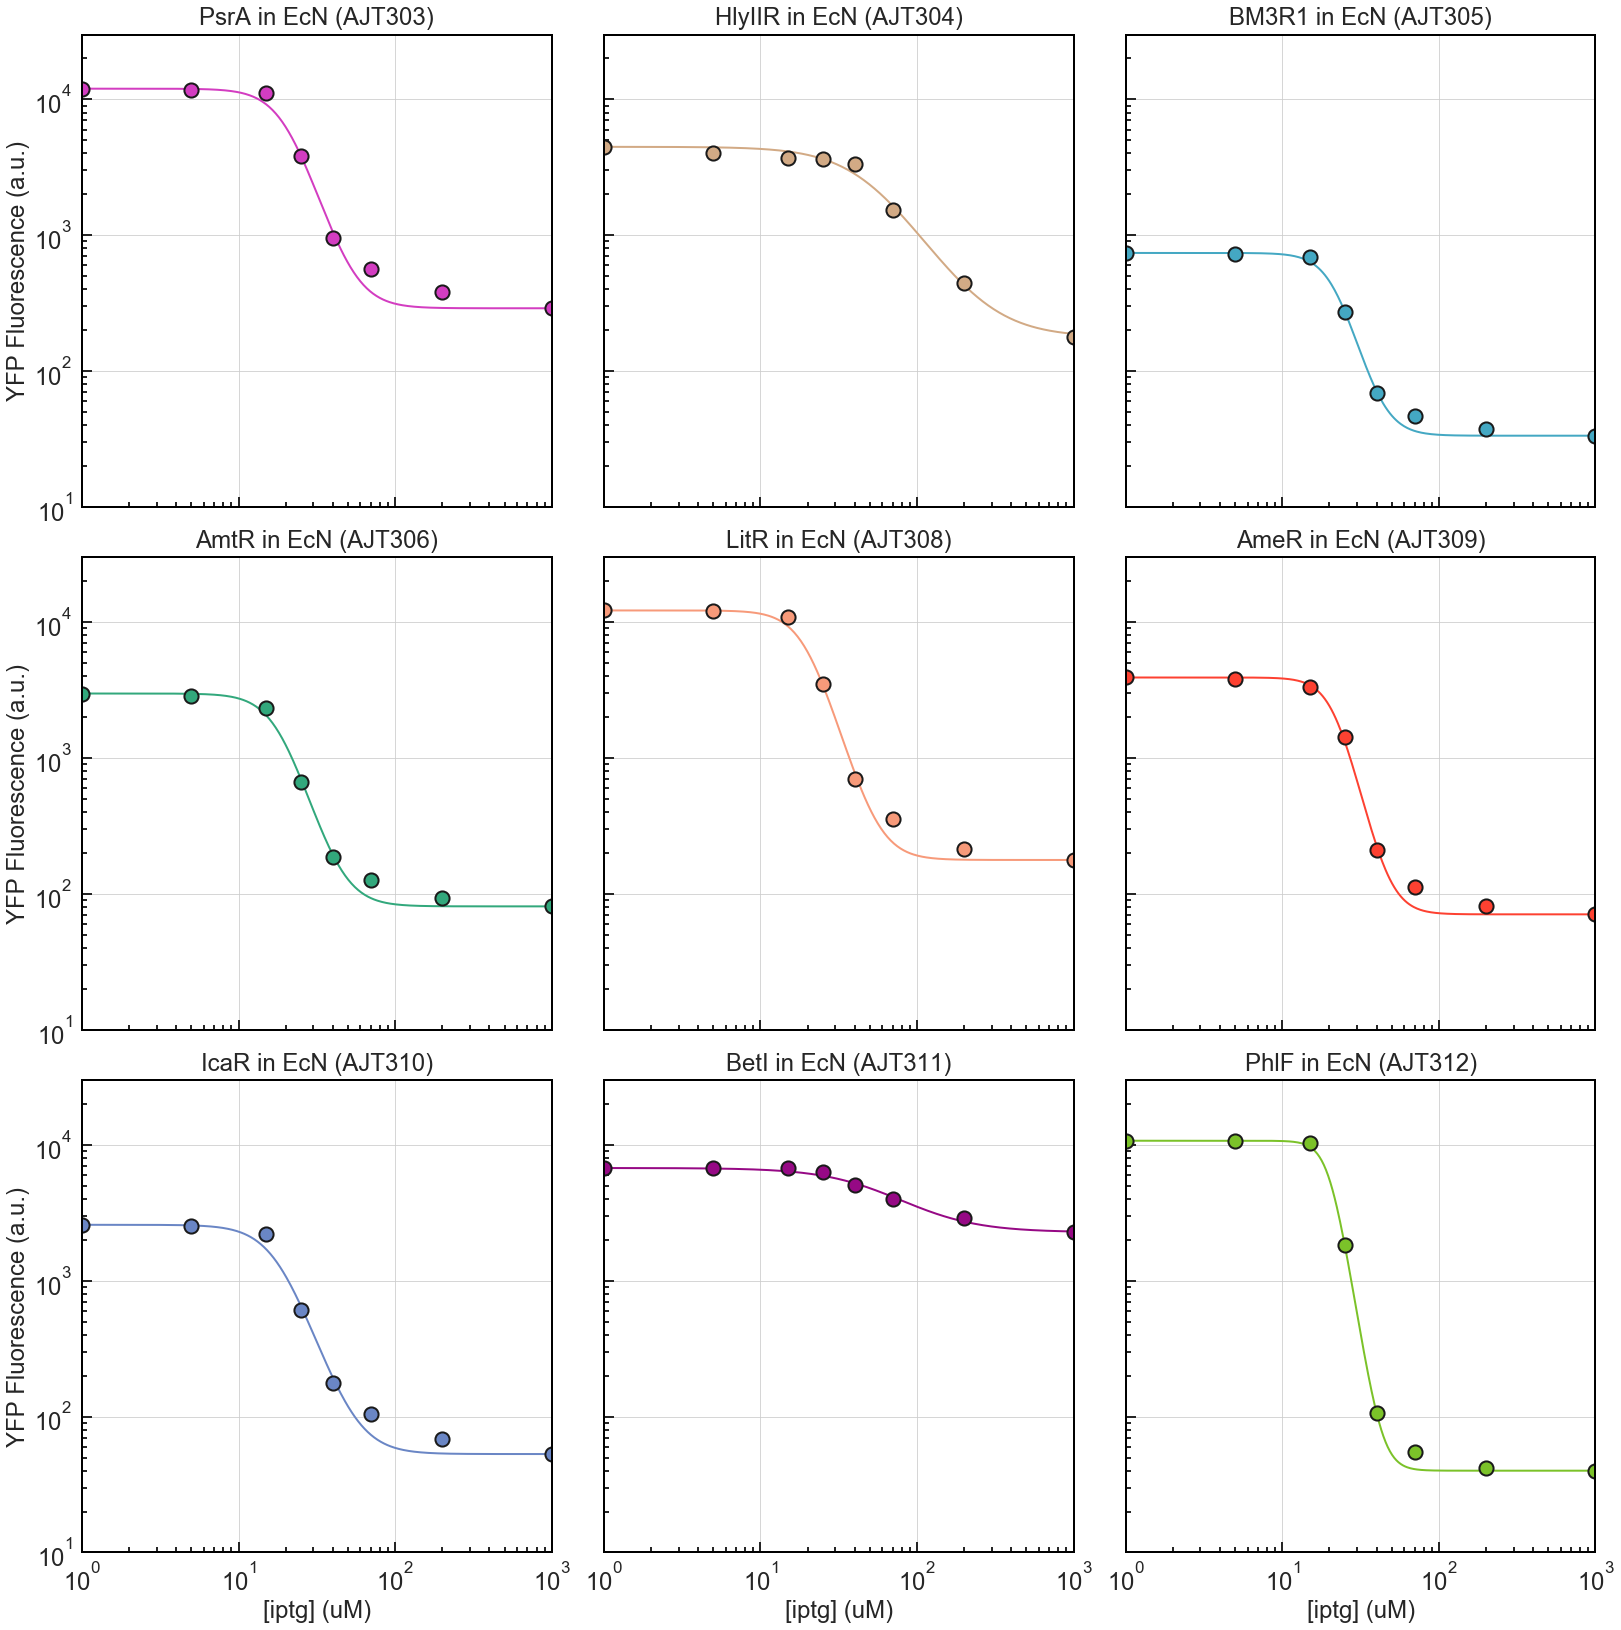

In [28]:
## plot transfer function (no autofluorescence subtracted)

rows = 3
cols = 3

fig, ax = plt.subplots(rows,cols, figsize=(7.5*cols,7.5*rows), sharey = 'row', sharex = 'col') # row, column format
plt.tight_layout(pad = 4, h_pad = 4, w_pad = 4) #tidies up spacing between plots

# ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)
# for spine in ax.spines.values():
#     spine.set_edgecolor('k')

tfs = dict() # dictionary that eventually contains transfer function information

for m in media:
    tfs[m] = dict()
    
    for i in inducers:
        tfs[m][i] = dict()
        for p in parent:
            tfs[m][i][p] = dict()
            # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if (len(filtered[filtered['strain_num']==s][i].unique())>1 and
                                                     s in filtered[filtered['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later

            for s in strains_subset:
                if s != 'AJT206' and s != 'AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382': # exclude these because I don't need them
#                 strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']                    ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)
                    for spine in ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(2)
                        
                    tfs[m][i][p][s] = build_transfer_functions([inducer_info[i]['plot_conc']], # x data
                                                      [data[m][i][p].loc[s].tolist()], # y data; needs to be a list for Jai's stuff
                                                      ['{} in {} ({})'.format(strain_info_rep[s]['repressor'], list(filtered[filtered['strain_num']==s]['parent_strain'].unique())[0], s)]) # name of transfer function                
                    ## scatter
                    # have to get data from tfs[m][i] as [0] because it is a list of lists, which in this case is only 1 list
                    # .inputs and .outputs notation is from Jai's script, which creates objects from what was fed to tf builder
                    ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].scatter(tfs[m][i][p][s][0].inputs, tfs[m][i][p][s][0].outputs,
                                                                            s = 200, zorder=2, c = strain_info_rep[s]['color'],
                                                                            edgecolors = 'k', linewidths = 2)

                    ## fitting line
                    xvals = np.logspace(np.log(inducer_info[i]['plot_conc'][0]),np.log(inducer_info[i]['plot_conc'][-1]), 1000) # x values for creating smooth line

                    # tfs[m][i][0].hill_eqn(xvals) outputs y values for hill equation at many x values; 
                    # uses fit parameters from build_transfer_functions module above
                    ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].plot(xvals, tfs[m][i][p][s][0].hill_eqn(xvals), 
                                                                                   color = strain_info_rep[s]['color'],
                                                                                   zorder = 1, linewidth = 2)

                    ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].set_yscale('log')
                    ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].set_xscale('log')
                    if fig_pos[m][s]['fig_col'] == 0:
                        ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].set_ylabel('YFP Fluorescence (a.u.)', size = 24)
                    if fig_pos[m][s]['fig_row'] == (rows-1):
                        ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].set_xlabel('[{}] (uM)'.format(i), size = 24)
                    ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].set_title(tfs[m][i][p][s][0].name, size = 24, pad = 10)

#                     # scatter
#                     ax[fig_pos[m][s]['fig_col']].scatter(inducer_info[i]['plot_conc'], 
#                                     data[m][i][p].loc[s], s = 200, zorder=2, c = strain_info[s]['color'], 
#                                     edgecolors = 'k', linewidths = 2)

#                     ax[fig_pos[m][s]['fig_col']].set_yscale('log')
#                     ax[fig_pos[m][s]['fig_col']].set_xscale('log')
#                     ax[fig_pos[m][s]['fig_col']].set_ylabel('YFP Fluorescence (au)', size = 24)
#                     ax[fig_pos[m][s]['fig_col']].set_xlabel('[{}] (uM)'.format(i), size = 24)
#                     ax[fig_pos[m][s]['fig_col']].set_title('{} in {} ({})'.format(strain_info[s]['promoter'],
#                                                                                   list(filtered[filtered['strain_num']==s]['parent_strain'].unique())[0], s), 
#                                                                                    size = 24)
                    ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].tick_params(labelsize = 24, length = 10, width = 2, direction = 'in', pad = 10)
                    ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].tick_params(which='minor', length = 5, width = 2, direction = 'in')
                    ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].set_ylim(10,30000)
                    ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].set_xlim(inducer_info[i]['plot_conc'][0],inducer_info[i]['plot_conc'][-1])

                    ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].yaxis.grid(True)
                    ax[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']].xaxis.grid(True)
                    
        #             ax[fig_pos[m][i]['fig_row']][fig_pos[m][i]['fig_col']].set_xticks(range(len(promoters)+1))
    #                 ax[fig_pos[m][i]['fig_row']][fig_pos[m][i]['fig_col']].set_xticklabels(inducer_info[i]['conc'])

    

In [29]:
# fig.savefig('TF_au.pdf', bbox_inches = "tight", transparent = True)


## Plot histogram-style transfer function (no autofluorescence subtracted)

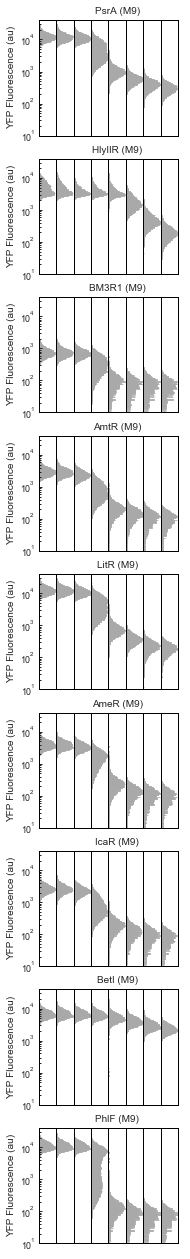

In [30]:
## Histogram-style transfer functions like in Cello SI

data_his_dict = dict() # initiate dictionary

fig_his, ax_his = plt.subplots(len(strains_subset),len(inducer_info[i]['conc']), figsize=(2.5,2.5*len(strains_subset))) # row, column format
plt.subplots_adjust(wspace=0) #get rid of horizontal spacing between plots

for m in media:
    data_his_dict[m] = dict()
    for i in inducers:  
        data_his_dict[m][i] = dict()
        for p in parent:
            data_his_dict[m][i][p] = dict()
        
        # since not all strains were induced with all inducers (e.g. Pvan was never induced with iptg), 
        # making separate strain lists for each inducer; otherwise, there will be an error that the strain 
        # with inducer condition !=0 doesn't exist (that's my guess anyways)

        # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if len(filtered[filtered['strain_num']==s][i].unique())>1]
            strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']

            for c in inducer_info[i]['conc']:
                data_his_dict[m][i][p][c] = dict()
                for s in strains_subset:
                    
                    FP = ax_his[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][inducer_info[i]['conc'].index(c)]
                    
                    for spine in FP.spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(1)

                    q = filtered.query('media == "{}"'.format(m) 
                                       + ' and ' + '{} == {}'.format(i, c) 
                                       + ' and ' +  'strain_num == "{}"'.format(s))
                    data_his_dict[m][i][p][c][s] = q['FITC-A']

    #                 print(strains_subset.index(s), inducer_info[i]['conc'].index(c))
                    logbins = np.geomspace(10,40000,200)
                    FP.hist(q['FITC-A'], 
                               bins = logbins, 
                               orientation='horizontal',
                               color = 'darkgray',
                               edgecolor = 'darkgray',
                               zorder=-1)
                    FP.set_yscale('log')
                    FP.set_ylim(10,40000)
                    FP.tick_params(axis='both',which='both', 
                                               bottom=False,top=False,
                                               labelbottom=False,
                                               right=False,left=False,
                                               labelleft=False)
                    FP.grid(False)
                    ax_his[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][0].set_ylabel('YFP Fluorescence (au)', size=10)
                    ax_his[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][4].set_title('{} ({})'.format(strain_info_rep[s]['repressor'], m), size = 10)
                    ax_his[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][0].tick_params(axis='y',which='major',left=True, 
                                                                   length=3, width=1, labelleft=True, direction='in')
                    ax_his[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][0].tick_params(axis='y',which='minor', left=True,
                                                                   length=1.5, width=1, direction='in')     
                
# make dictionary of dataframes beacuse dataframes look nicer
data_his = dict()

for m in media:
    data_his[m] = dict()
    for i in inducers:
        data_his[m][i] = dict()
        for p in parent:
            data_his[m][i][p] = pd.DataFrame.from_dict(data_his_dict[m][i][p])

                
                

## Subtract autofluorescence

In [46]:
# make dictionary of dataframes beacuse dataframes look nicer
data_autosub = dict()
autofluor = dict()

for m in media:
    data_autosub[m] = dict()
    autofluor[m] = dict()
    for i in inducers:
        data_autosub[m][i] = dict()
        autofluor[m][i] = dict()
        for p in parent:
            if p == 'AJT207':
                autofluor[m][i][p] = data[m][i][p].loc['AJT362', :]
            elif p == 'AJT209':
                autofluor[m][i][p] = data[m][i][p].loc['AJT361', :]
            elif p == 'EcN':
                autofluor[m][i][p] = data[m][i][p].loc['AJT206', :]
            data_autosub[m][i][p] = data[m][i][p].subtract(autofluor[m][i][p], axis = 1)
            data_autosub[m][i][p] = data_autosub[m][i][p].mask(data_autosub[m][i][p] <= 0, 1)


data_autosub['M9']['iptg']['EcN']

,0.0,5.0,15.0,25.0,40.0,70.0,200.0,1000.0
AJT206,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AJT269,14.880001,22.320000,88.349995,1004.400028,1856.280048,2469.150127,2978.789911,3474.480030
AJT280,1065.779991,1065.780060,1053.690052,1045.319950,1019.280048,1007.190044,982.080011,995.100025
AJT303,12201.600548,12286.695099,12043.500233,8714.565311,1476.839985,695.639996,385.950006,288.300007
AJT304,3688.380089,3979.005035,3959.939930,3955.289921,3843.689960,2272.919903,416.640009,159.959995
AJT305,749.579979,756.089996,712.379993,489.179996,71.609997,26.970001,13.019999,6.510002
AJT306,2754.660118,2832.780060,1972.530018,250.169987,117.179996,83.700001,64.170000,50.220005
AJT307,9969.600548,9980.295197,9808.710194,9754.770390,9446.010273,9130.739727,8442.540155,7548.809864
AJT308,11770.080040,11674.290314,6329.579823,822.119999,305.969990,197.160000,145.079996,115.319996
AJT309,4387.740196,4300.320099,2920.199940,641.700016,140.429996,83.700001,60.449999,46.500004


In [47]:
data['M9']['iptg']['EcN']

,0.0,5.0,15.0,25.0,40.0,70.0,200.0,1000.0
AJT206,43.709999,42.779999,39.990002,38.130001,36.270000,33.480000,31.620001,32.549999
AJT269,58.590000,65.099998,128.339996,1042.530029,1892.550049,2502.630127,3010.409912,3507.030029
AJT280,1109.489990,1108.560059,1093.680054,1083.449951,1055.550049,1040.670044,1013.700012,1027.650024
AJT303,12245.310547,12329.475098,12083.490234,8752.695312,1513.109985,729.119995,417.570007,320.850006
AJT304,3732.090088,4021.785034,3999.929932,3993.419922,3879.959961,2306.399902,448.260010,192.509995
AJT305,793.289978,798.869995,752.369995,527.309998,107.879997,60.450001,44.639999,39.060001
AJT306,2798.370117,2875.560059,2012.520020,288.299988,153.449997,117.180000,95.790001,82.770004
AJT307,10013.310547,10023.075195,9848.700195,9792.900391,9482.280273,9164.219727,8474.160156,7581.359863
AJT308,11813.790039,11717.070312,6369.569824,860.250000,342.239990,230.639999,176.699997,147.869995
AJT309,4431.450195,4343.100098,2960.189941,679.830017,176.699997,117.180000,92.070000,79.050003


## Plot in RPU (autofluorescence subtracted)

In [48]:
## Put things in RPU
data_RPU = dict()

for m in media:
    data_RPU[m] = dict()
    for i in inducers:
        data_RPU[m][i] = dict()
        for p in parent:
            if p == 'AJT207':
                data_RPU[m][i][p] = data_autosub[m][i][p].div(data_autosub[m][i][p].loc["AJT382",:], axis = 1)
            elif p == 'AJT209':
                data_RPU[m][i][p] = data_autosub[m][i][p].div(data_autosub[m][i][p].loc["AJT374",:], axis = 1)
            elif p == 'EcN':
                data_RPU[m][i][p] = data_autosub[m][i][p].div(data_autosub[m][i][p].loc["AJT280",:], axis = 1)
data_RPU['M9']['iptg']['EcN']

,0.0,5.0,15.0,25.0,40.0,70.0,200.0,1000.0
AJT206,0.000938,0.000938,0.000949,0.000957,0.000981,0.000993,0.001018,0.001005
AJT269,0.013962,0.020942,0.083848,0.960854,1.821168,2.451524,3.033144,3.491589
AJT280,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AJT303,11.448517,11.528359,11.429832,8.336744,1.448905,0.690674,0.392992,0.289720
AJT304,3.460733,3.733420,3.758164,3.783808,3.770985,2.256694,0.424242,0.160748
AJT305,0.703316,0.709424,0.676081,0.467972,0.070255,0.026777,0.013258,0.006542
AJT306,2.584642,2.657941,1.872021,0.239324,0.114963,0.083102,0.065341,0.050467
AJT307,9.354276,9.364310,9.308914,9.331851,9.267336,9.065558,8.596591,7.585981
AJT308,11.043630,10.953752,6.007060,0.786477,0.300182,0.195753,0.147727,0.115888
AJT309,4.116929,4.034904,2.771403,0.613879,0.137774,0.083102,0.061553,0.046729


In [49]:
# AJT269_r2_RPU_v2_store = data_RPU['M9']['iptg']['EcN'].loc['AJT269']
# AJT303_r2_RPU_store = data_RPU['M9']['iptg']['EcN'].loc['AJT303']
# AJT304_r2_RPU_store = data_RPU['M9']['iptg']['EcN'].loc['AJT304']
# AJT305_r2_RPU_store = data_RPU['M9']['iptg']['EcN'].loc['AJT305']
# AJT306_r2_RPU_store = data_RPU['M9']['iptg']['EcN'].loc['AJT306']
# AJT307_r2_RPU_store = data_RPU['M9']['iptg']['EcN'].loc['AJT307']
# AJT308_r2_RPU_store = data_RPU['M9']['iptg']['EcN'].loc['AJT308']
# AJT309_r2_RPU_store = data_RPU['M9']['iptg']['EcN'].loc['AJT309']
# AJT310_r2_RPU_store = data_RPU['M9']['iptg']['EcN'].loc['AJT310']
# AJT311_r2_RPU_store = data_RPU['M9']['iptg']['EcN'].loc['AJT311']
# AJT312_r2_RPU_store = data_RPU['M9']['iptg']['EcN'].loc['AJT312']

# %store AJT269_r2_RPU_v2_store
# %store AJT303_r2_RPU_store
# %store AJT304_r2_RPU_store
# %store AJT305_r2_RPU_store
# %store AJT306_r2_RPU_store
# %store AJT307_r2_RPU_store
# %store AJT308_r2_RPU_store
# %store AJT309_r2_RPU_store
# %store AJT310_r2_RPU_store
# %store AJT311_r2_RPU_store
# %store AJT312_r2_RPU_store

Stored 'AJT269_r2_RPU_v2_store' (Series)
Stored 'AJT303_r2_RPU_store' (Series)
Stored 'AJT304_r2_RPU_store' (Series)
Stored 'AJT305_r2_RPU_store' (Series)
Stored 'AJT306_r2_RPU_store' (Series)
Stored 'AJT307_r2_RPU_store' (Series)
Stored 'AJT308_r2_RPU_store' (Series)
Stored 'AJT309_r2_RPU_store' (Series)
Stored 'AJT310_r2_RPU_store' (Series)
Stored 'AJT311_r2_RPU_store' (Series)
Stored 'AJT312_r2_RPU_store' (Series)


## Histogram-style transfer function (RPU)

In [50]:
## Subtract autofluorescence from histogram data and put in RPU

# make dictionary of dataframes beacuse dataframes look nicer
data_his_autosub = dict()
data_his_RPU = dict()
autofluor_his = dict()

for m in media:
    data_his_autosub[m] = dict()
    data_his_RPU[m] = dict()
    autofluor_his[m] = dict()
    for i in inducers:
        data_his_autosub[m][i] = dict()
        data_his_RPU[m][i] = dict()
        autofluor_his[m][i] = dict()
        for p in parent:
            if p == 'AJT207':
                autofluor_his[m][i][p] = data[m][i][p].loc["AJT362", :]
            elif p == 'AJT209':
                autofluor_his[m][i][p] = data[m][i][p].loc["AJT361", :]
            elif p == 'EcN':
                autofluor_his[m][i][p] = data[m][i][p].loc["AJT206", :]
            data_his_autosub[m][i][p] = data_his[m][i][p].subtract(autofluor_his[m][i][p], axis = 1)
            strains_subset = [s for s in strains if len(filtered[filtered['strain_num']==s][i].unique())>1]
            strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']
            for c in inducer_info[i]['conc']:
                for s in strains_subset:
                    data_his_autosub[m][i][p][c][s].loc[data_his_autosub[m][i][p][c][s].loc[:]<=0] = 0.1
    #                 print(data_autosub[m][i].loc["AJT280",c])
            if p == 'AJT207':
                data_his_RPU[m][i][p] = data_his_autosub[m][i][p].divide(data_autosub[m][i][p].loc["AJT382",c])
            elif p == 'AJT209':
                data_his_RPU[m][i][p] = data_his_autosub[m][i][p].divide(data_autosub[m][i][p].loc["AJT374",c])
            elif p == 'EcN':
                data_his_RPU[m][i][p] = data_his_autosub[m][i][p].divide(data_autosub[m][i][p].loc["AJT280",c])

# data_his_autosub['M9']['iptg']

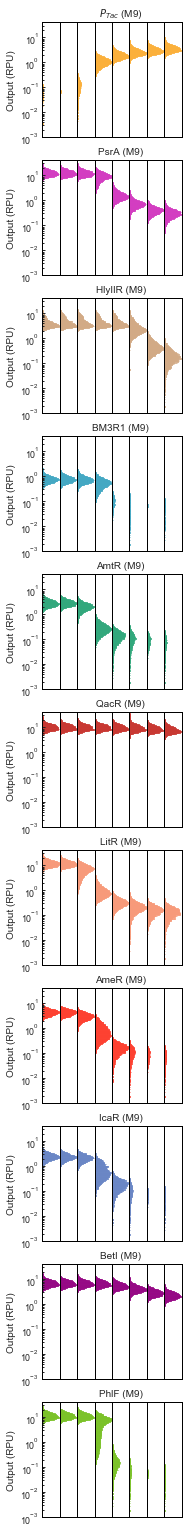

In [37]:
fig_hisRPU, ax_hisRPU = plt.subplots(len(strains_subset),len(inducer_info[i]['conc']), figsize=(2.5,2.5*len(strains_subset))) # row, column format
plt.subplots_adjust(wspace=0) #get rid of horizontal spacing between plots

for m in media:
    for i in inducers:  
        for p in parent:

            # since not all strains were induced with all inducers (e.g. Pvan was never induced with iptg), 
            # making separate strain lists for each inducer; otherwise, there will be an error that the strain 
            # with inducer condition !=0 doesn't exist (that's my guess anyways)

            # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if len(filtered[filtered['strain_num']==s][i].unique())>1]
            strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']

            for c in inducer_info[i]['conc']:
                for s in strains_subset:
                    
                    FP = ax_hisRPU[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][inducer_info[i]['conc'].index(c)]
                    
                    for spine in FP.spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(1)

                    logbins = np.geomspace(.001,40,200)
                    FP.hist(data_his_RPU[m][i][p][c][s], 
                                           bins = logbins, 
                                           orientation='horizontal',
                                           color = strain_info_rep[s]['color'],
                                           edgecolor = strain_info_rep[s]['color'],
                                           zorder=-1)
                    FP.set_yscale('log')
                    FP.set_ylim(.001,40)
                    FP.tick_params(axis='both',which='both', 
                                               bottom=False,top=False,
                                               labelbottom=False,
                                               right=False,left=False,
                                               labelleft=False)
                    FP.grid(False)
                    ax_hisRPU[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][0].set_ylabel('Output (RPU)', size=10)
                    ax_hisRPU[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][4].set_title('{} ({})'.format(strain_info_rep[s]['repressor'], m), size = 10)
                    ax_hisRPU[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][0].tick_params(axis='y',which='major',left=True, 
                                                                   length=3, width=1, labelleft=True, direction='in')
                    ax_hisRPU[cols*fig_pos[m][s]['fig_row']+fig_pos[m][s]['fig_col']][0].tick_params(axis='y',which='minor', left=True,
                                                                   length=1.5, width=1, direction='in') 

In [77]:
# fig_hisRPU.savefig(fig_dir+'/TransferFunctions_Histograms.pdf', bbox_inches = "tight", transparent = True)


### Arrange plots better using GridSpec

In [38]:
# deleted this section because didn't need it since I only had one plot, but keeping section title so I remember I have it in older files
import matplotlib.gridspec as gridspec

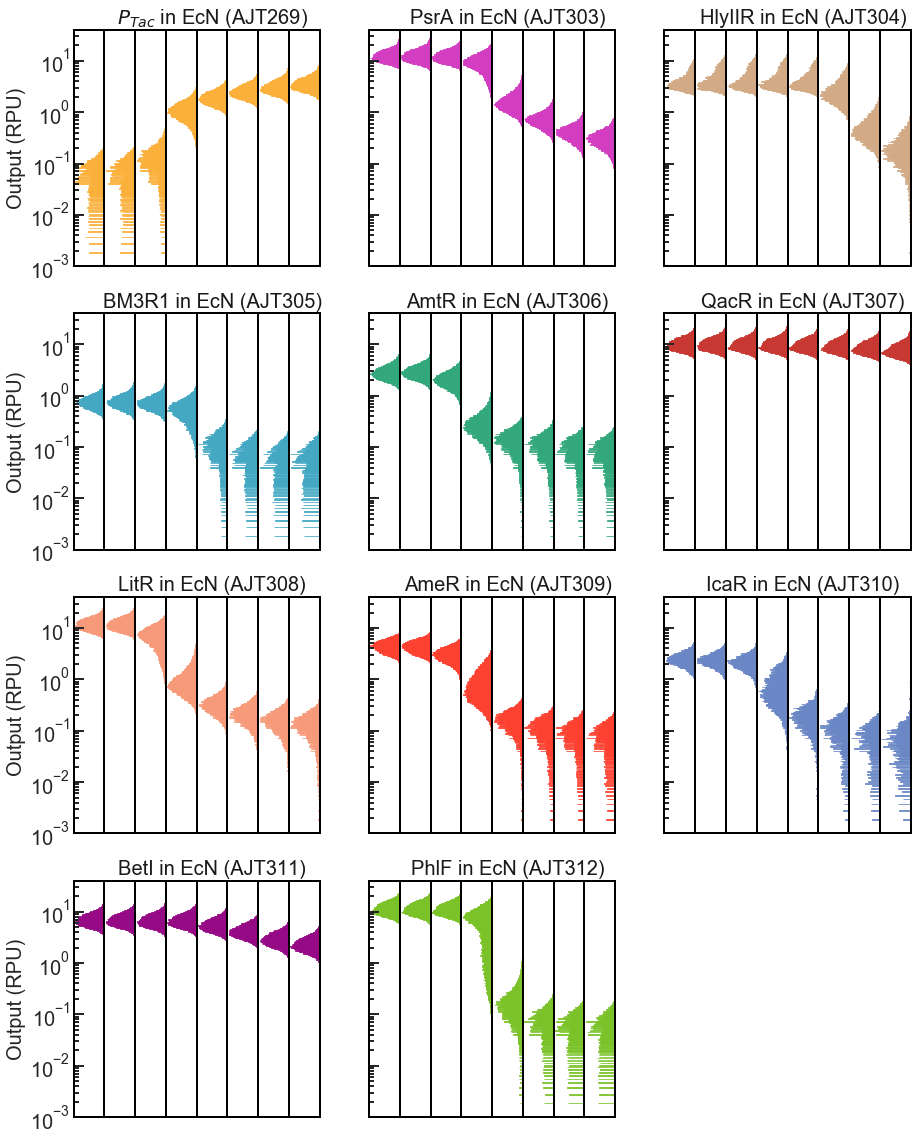

In [51]:
rows = 4
cols = 3

grid_height = len(inducer_info['iptg']['conc'])

fig_test = plt.figure(figsize = (cols*5,rows*5))
main_grid = gridspec.GridSpec(rows,cols) 
# remove width space from between plots so they are scrunched together like Alec's plot
grid1 = main_grid[0].subgridspec(1,grid_height, wspace=0)
grid2 = main_grid[1].subgridspec(1,grid_height, wspace=0)
grid3 = main_grid[2].subgridspec(1,grid_height, wspace=0)
grid4 = main_grid[3].subgridspec(1,grid_height, wspace=0)
grid5 = main_grid[4].subgridspec(1,grid_height, wspace=0)
grid6 = main_grid[5].subgridspec(1,grid_height, wspace=0)
grid7 = main_grid[6].subgridspec(1,grid_height, wspace=0)
grid8 = main_grid[7].subgridspec(1,grid_height, wspace=0)
grid9 = main_grid[8].subgridspec(1,grid_height, wspace=0)
grid10 = main_grid[9].subgridspec(1,grid_height, wspace=0)
grid11 = main_grid[10].subgridspec(1,grid_height, wspace=0)

# so grids can be iterated through because main_grid can't for some reason
grids = [grid1, grid2, grid3, grid4, grid5, grid6, grid7, grid8, grid9, grid10, grid11]

# list of axes to be created (empty lists containing 12 empty lists)
axes = [[[] for i in range(12)] for j in range(len(grids))]

for m in media:
    for i in inducers:  
        for p in parent:
        
            strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']

            for c in inducer_info[i]['conc']:
                for s in strains_subset:
                    # add subplot to figure and assign to axes list of lists
                    axes[strains_subset.index(s)][inducer_info[i]['conc'].index(c)] = fig_test.add_subplot(grids[strains_subset.index(s)][inducer_info[i]['conc'].index(c)])

                    ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)
                    for spine in axes[strains_subset.index(s)][inducer_info[i]['conc'].index(c)].spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(2)

                    # make bin boundaries in log space (min, max, # of bins)
                    logbins = np.geomspace(.001,40,400)
                    axes[strains_subset.index(s)][inducer_info[i]['conc'].index(c)].hist(data_his_RPU[m][i][p][c][s], 
                                                                                           bins = logbins, 
                                                                                           orientation='horizontal',
                                                                                           color = strain_info_rep[s]['color'],
                                                                                           edgecolor = strain_info_rep[s]['color'],
                                                                                           zorder=-1)
                    # to get bottom of axis on right side (to match Alec's plots)
                    axes[strains_subset.index(s)][inducer_info[i]['conc'].index(c)].invert_xaxis()

                    axes[strains_subset.index(s)][inducer_info[i]['conc'].index(c)].set_yscale('log')
                    axes[strains_subset.index(s)][inducer_info[i]['conc'].index(c)].set_ylim(.001,40)

                    # remove tick marks and labels from all plots (add them back to desired plots below)
                    axes[strains_subset.index(s)][inducer_info[i]['conc'].index(c)].tick_params(axis='both',which='both', 
                                                                                       bottom=False,top=False,
                                                                                       labelbottom=False,
                                                                                       right=False,left=False,
                                                                                       labelleft=False)
                    axes[strains_subset.index(s)][inducer_info[i]['conc'].index(c)].grid(False)

                    # need this statement because axes[x][6] = [] when loop starts; can't set_title of non-axis
                    # adds title to each "subplot"
                    if axes[strains_subset.index(s)][(len(inducer_info[i]['conc'])//2)] != []:
                        #to add parent strain, needed to access this way because for loop would just fill value with whatever p's current value is instead of the one that corresponds to the strain number 
                        axes[strains_subset.index(s)][(len(inducer_info[i]['conc'])//2)].set_title('{} in {} ({})'.format(strain_info_rep[s]['repressor'], list(filtered[filtered['strain_num']==s]['parent_strain'].unique())[0], s), 
                                                                   size = 20, color = 'k', fontname = 'Arial')

                    # add tick marks, but not labels, to all plots
                    axes[strains_subset.index(s)][0].tick_params(axis='y',which='major',left=True, 
                                                                   length=10, width=2, labelleft=False, direction='in')
                    axes[strains_subset.index(s)][0].tick_params(axis='y',which='minor', left=True,
                                                                   length=5, width=2, direction='in')

                    # change font to Avenir for tick labels
                    for tick in axes[strains_subset.index(s)][inducer_info[i]['conc'].index(c)].get_yticklabels():
                        tick.set_fontname("Arial")                

                    # Add y_label and tick labels to plots on left
                    
                    if strains_subset.index(s) % cols == 0: # only want plots on left so only taking numbers where remainder is 0
                        axes[strains_subset.index(s)][0].set_ylabel('Output (RPU)', size=20, fontname = 'Arial')
                        axes[strains_subset.index(s)][0].tick_params(labelleft=True, labelsize = 20)                

        

In [52]:
# fig_test.savefig(fig_dir+'/TransferFunctions_Histograms.pdf', bbox_inches = "tight", transparent = True)


## RPU Transfer Functions (with curve fit)

In [42]:
# Jai's fancy script that contains a class that builds transfer functions
## path for it in terminal open -a Sublime\ Text transferfunction.py

%load_ext autoreload
# %autoreload # to make sure that it reloads properly when this is run
from transferfunction import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.6/site-packages/transferfunction.py:60: RuntimeWarning: invalid value encountered in double_scalars


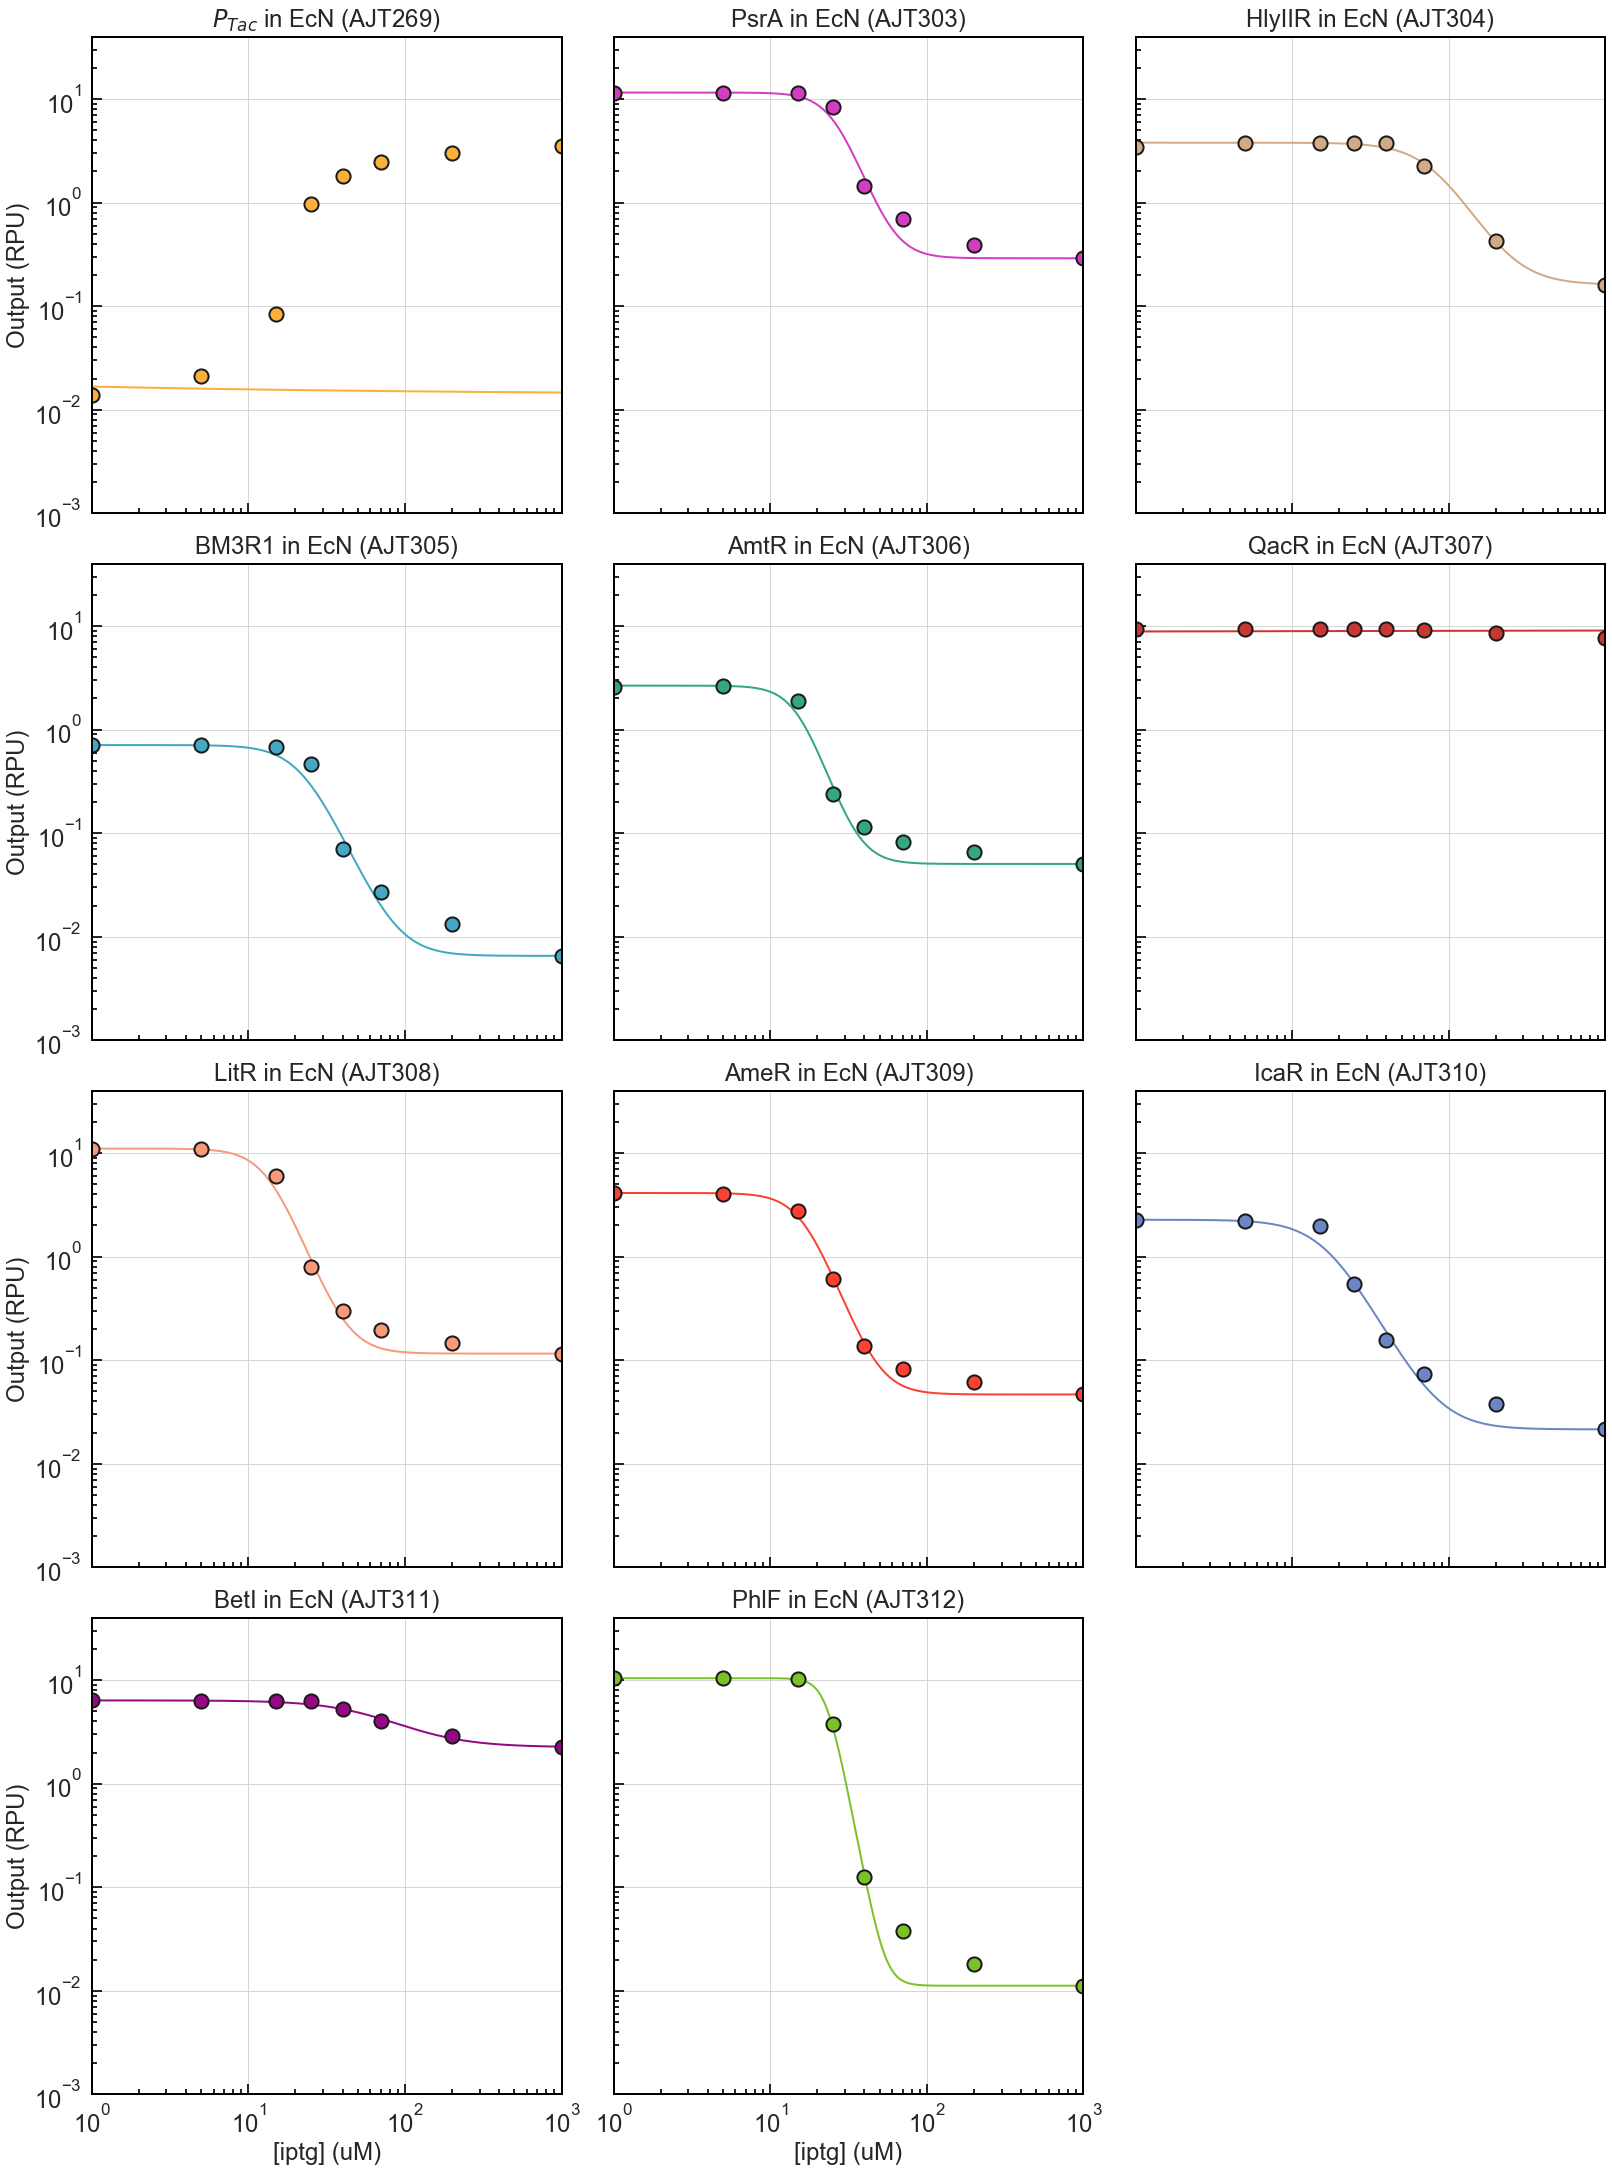

In [53]:
## This one is me making Jai's strategy work with how I already have my data

rows = 4
cols = 3


figRPU, axRPU = plt.subplots(rows,cols, figsize=(7.5*cols,7.5*rows), sharey = 'row', sharex = 'col') # row, column format
plt.tight_layout(pad = 4, h_pad = 4, w_pad = 4) #tidies up spacing between plots

tfs_RPU = dict() # dictionary that eventually contains transfer function information

for m in media:
    tfs_RPU[m] = dict()
    
    for i in inducers:
        tfs_RPU[m][i] = dict()
        for p in parent:
            tfs_RPU[m][i][p] = dict()
            # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if (len(filtered[filtered['strain_num']==s][i].unique())>1 and
                                                     s in filtered[filtered['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later

            for s in strains_subset:
                if s != 'AJT206' and s != 'AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382': # exclude these because I don't need them
#                 strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']                    ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)

                    FP = axRPU[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']]

                    for spine in FP.spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(2)

                    tfs_RPU[m][i][p][s] = build_transfer_functions([inducer_info[i]['plot_conc']], # x data
                                                      [data_RPU[m][i][p].loc[s].tolist()], # y data; needs to be a list for Jai's stuff
                                                      ['{} in {} ({})'.format(strain_info_rep[s]['repressor'], list(filtered[filtered['strain_num']==s]['parent_strain'].unique())[0], s)]) # name of transfer function                
                    ## scatter
                    # have to get data from tfs[m][i] as [0] because it is a list of lists, which in this case is only 1 list
                    # .inputs and .outputs notation is from Jai's script, which creates objects from what was fed to tf builder
                    FP.scatter(tfs_RPU[m][i][p][s][0].inputs, tfs_RPU[m][i][p][s][0].outputs,
                                                            s = 200, zorder=2, c = strain_info_rep[s]['color'],
                                                            edgecolors = 'k', linewidths = 2)

                    ## fitting line
                    xvals = np.logspace(np.log(inducer_info[i]['plot_conc'][0]),np.log(inducer_info[i]['plot_conc'][-1]), 1000) # x values for creating smooth line

                    # tfs[m][i][0].hill_eqn(xvals) outputs y values for hill equation at many x values; 
                    # uses fit parameters from build_transfer_functions module above
                    FP.plot(xvals, tfs_RPU[m][i][p][s][0].hill_eqn(xvals), 
                                                           color = strain_info_rep[s]['color'],
                                                           zorder = 1, linewidth = 2)

                    FP.set_yscale('log')
                    FP.set_xscale('log')
                    if fig_pos[m][s]['fig_col'] == 0:
                        FP.set_ylabel('Output (RPU)', size = 24)
                    if fig_pos[m][s]['fig_row'] == (rows-1):
                        FP.set_xlabel('[{}] (uM)'.format(i), size = 24)
                    FP.set_title(tfs_RPU[m][i][p][s][0].name, size = 24, pad = 10)
                    FP.tick_params(labelsize = 24, length = 10, width = 2, direction = 'in', pad = 10)
                    FP.tick_params(which='minor', length = 5, width = 2, direction = 'in')
                    FP.set_xlim(inducer_info[i]['plot_conc'][0],inducer_info[i]['plot_conc'][-1])
                    FP.set_ylim(0.001,40)
                    FP.yaxis.grid(True)
                    FP.xaxis.grid(True)
                    
# gets rid of empty plots
figRPU.delaxes(axRPU[3,2]) # zero indexing            

In [54]:
# figRPU.savefig(fig_dir+'/TransferFunctions_all.pdf', bbox_inches = "tight", transparent = True)


/usr/local/lib/python3.6/site-packages/transferfunction.py:60: RuntimeWarning: invalid value encountered in double_scalars


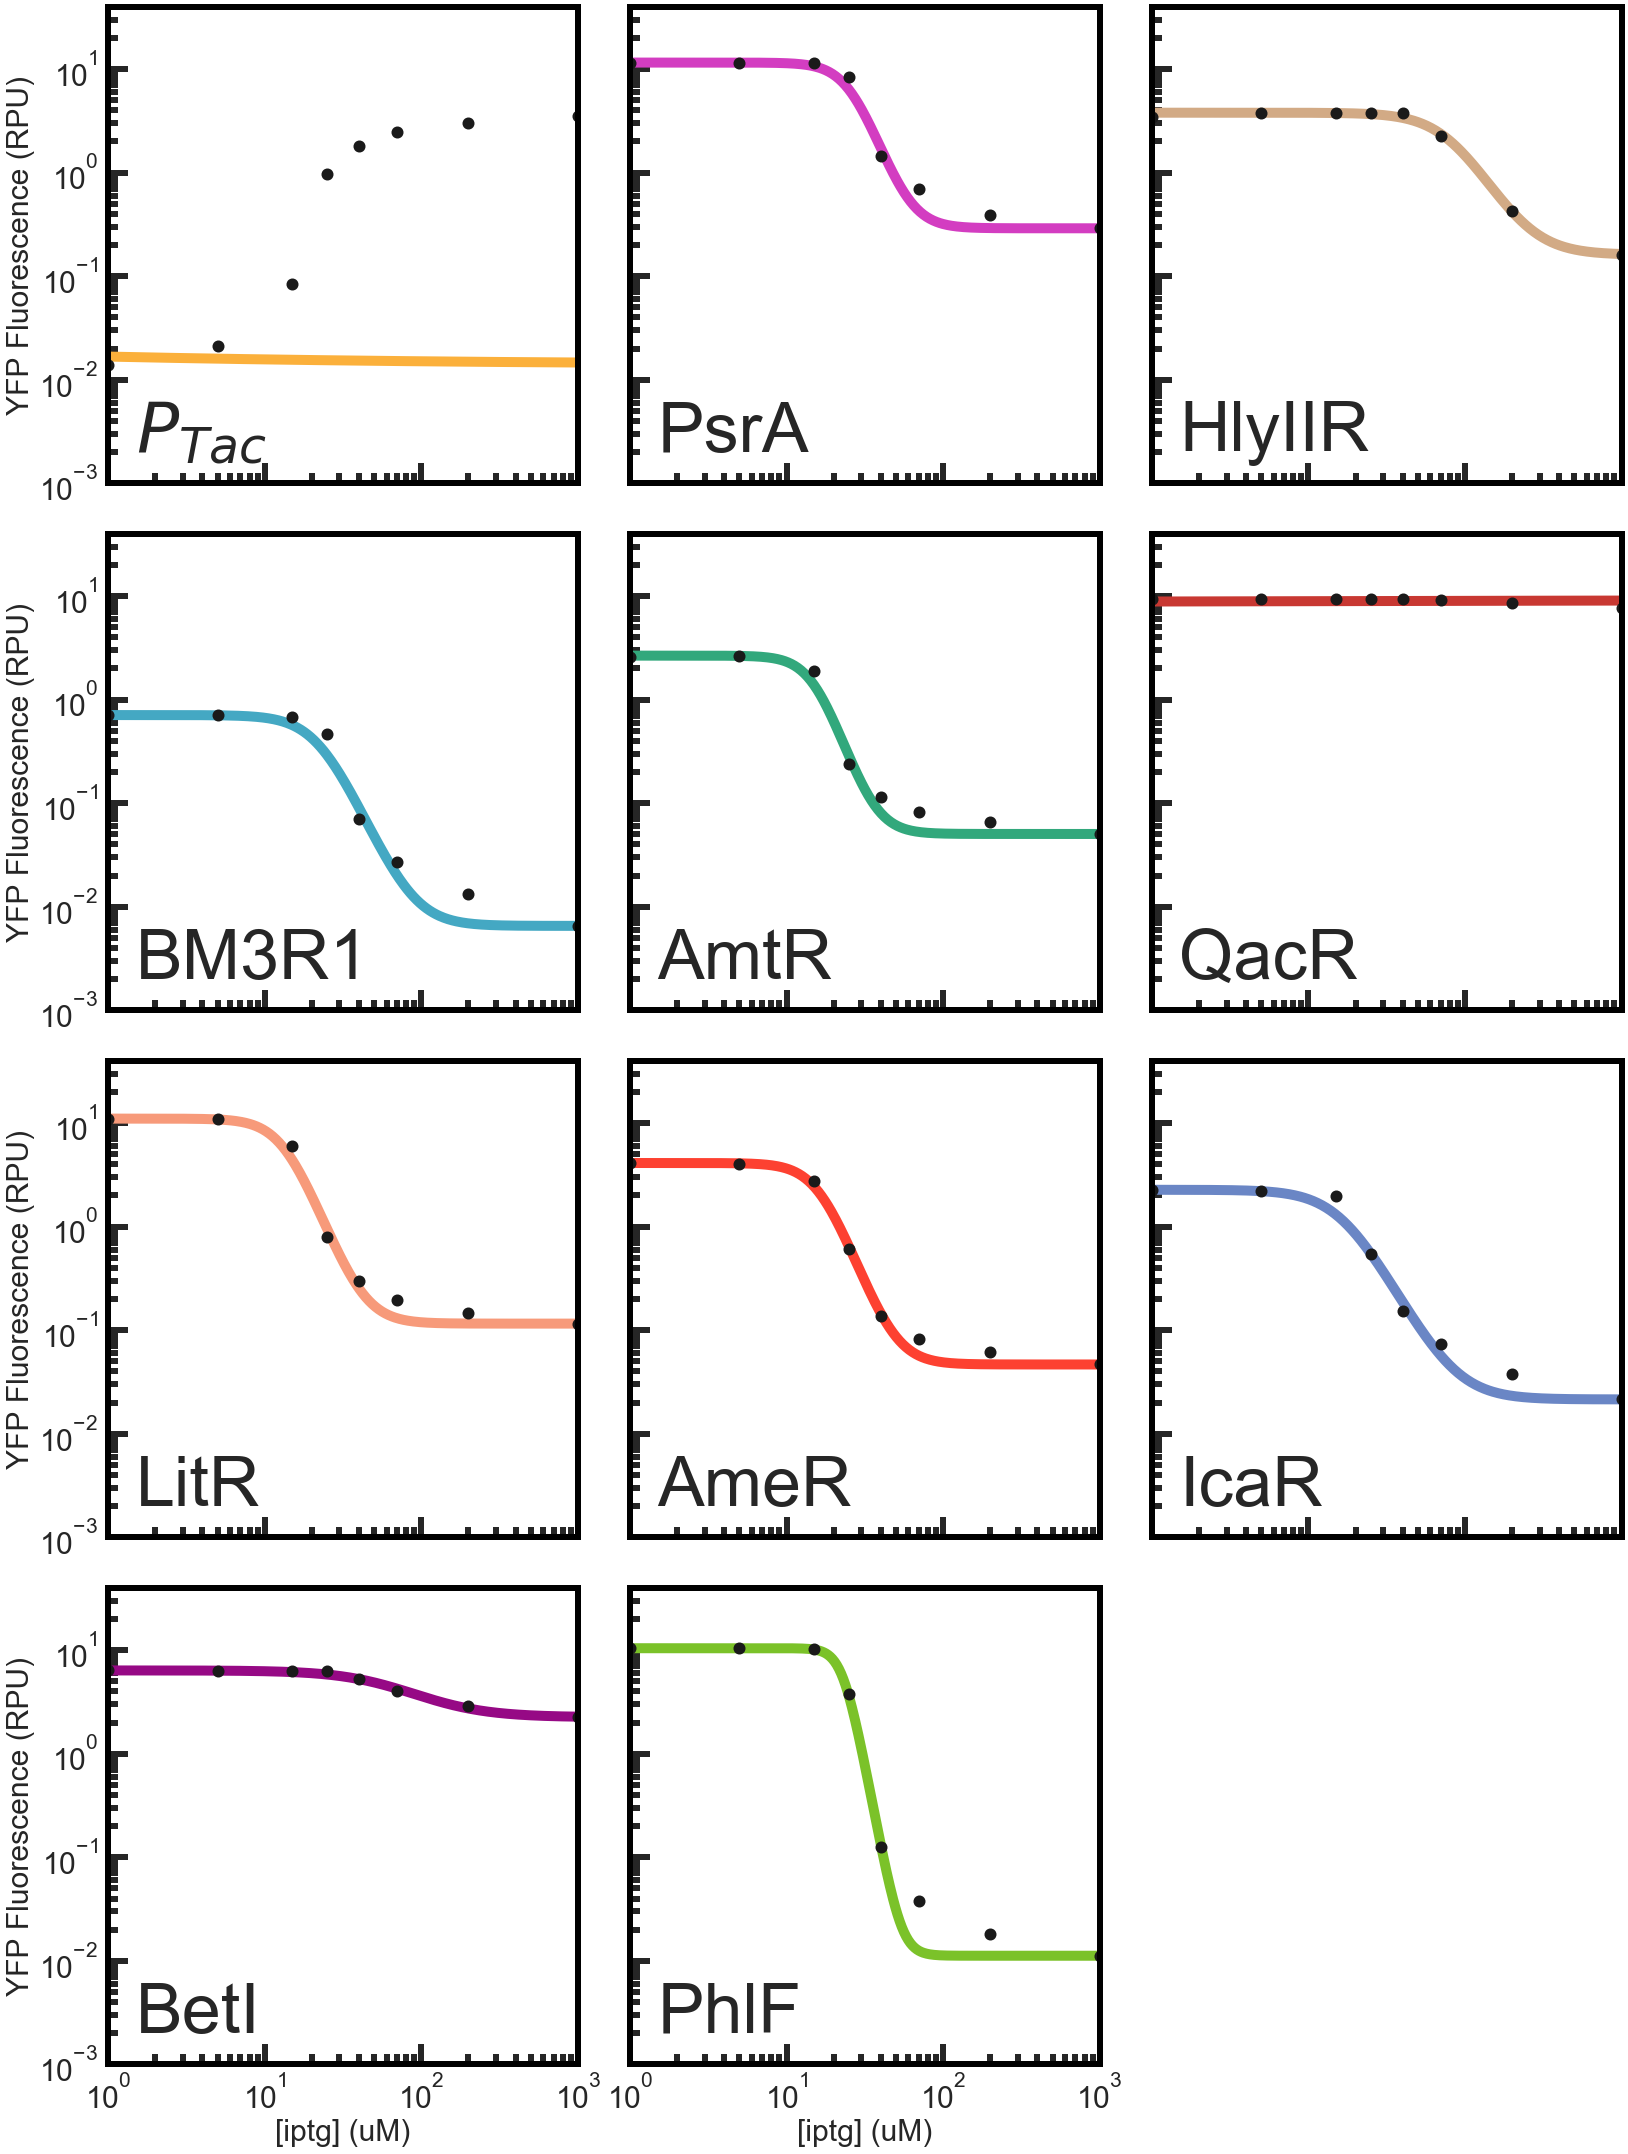

In [56]:
## This one is me making Jai's strategy work with how I already have my data

rows = 4
cols = 3


figRPU2, axRPU2 = plt.subplots(rows,cols, figsize=(7.5*cols,7.5*rows), sharey = 'row', sharex = 'col') # row, column format
plt.tight_layout(pad = 4, h_pad = 4, w_pad = 4) #tidies up spacing between plots

tfs_RPU = dict() # dictionary that eventually contains transfer function information

for m in media:
    tfs_RPU[m] = dict()
    
    for i in inducers:
        tfs_RPU[m][i] = dict()
        for p in parent:
            tfs_RPU[m][i][p] = dict()
            # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if (len(filtered[filtered['strain_num']==s][i].unique())>1 and
                                                     s in filtered[filtered['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later

            for s in strains_subset:
                if s != 'AJT206' and s != 'AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382': # exclude these because I don't need them
#                 strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']                    ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)

                    FP = axRPU2[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']]

                    for spine in FP.spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(6)

                    tfs_RPU[m][i][p][s] = build_transfer_functions([inducer_info[i]['plot_conc']], # x data
                                                      [data_RPU[m][i][p].loc[s].tolist()], # y data; needs to be a list for Jai's stuff
                                                      ['{} in {} ({})'.format(strain_info_rep[s]['repressor'], list(filtered[filtered['strain_num']==s]['parent_strain'].unique())[0], s)]) # name of transfer function                
                    ## scatter
                    # have to get data from tfs[m][i] as [0] because it is a list of lists, which in this case is only 1 list
                    # .inputs and .outputs notation is from Jai's script, which creates objects from what was fed to tf builder
                    FP.scatter(tfs_RPU[m][i][p][s][0].inputs, tfs_RPU[m][i][p][s][0].outputs,
                                                            s = 100, zorder=2, c = 'k',
                                                            edgecolors = 'k', linewidths = 2)

                    ## fitting line
                    xvals = np.logspace(np.log(inducer_info[i]['plot_conc'][0]),np.log(inducer_info[i]['plot_conc'][-1]), 1000) # x values for creating smooth line

                    # tfs[m][i][0].hill_eqn(xvals) outputs y values for hill equation at many x values; 
                    # uses fit parameters from build_transfer_functions module above
                    FP.plot(xvals, tfs_RPU[m][i][p][s][0].hill_eqn(xvals), 
                                                           color = strain_info_rep[s]['color'],
                                                           zorder = 1, linewidth = 10)

                    FP.set_yscale('log')
                    FP.set_xscale('log')
                    if fig_pos[m][s]['fig_col'] == 0:
                        FP.set_ylabel('YFP Fluorescence (RPU)', size = 30)
                    if fig_pos[m][s]['fig_row'] == (rows-1):
                        FP.set_xlabel('[{}] (uM)'.format(i), size = 30)
#                     FP.set_title(tfs_RPU[m][i][p][s][0].name, size = 24, pad = 10)
                    FP.tick_params(labelsize = 30, length = 20, width = 6, direction = 'in', pad = 10)
                    FP.tick_params(which='minor', length = 10, width = 6, direction = 'in')
                    FP.set_xlim(inducer_info[i]['plot_conc'][0],inducer_info[i]['plot_conc'][-1])
                    FP.set_ylim(0.001,40)
                    FP.yaxis.grid(False)
                    FP.xaxis.grid(False)
                    
                    FP.text(min(tfs_RPU[m][i][p][s][0].inputs)*1.5, 0.0015 , strain_info_rep[s]['repressor'], 
                                                                      verticalalignment = 'bottom', horizontalalignment = 'left', 
                                                                      fontsize = 70)
                    
# gets rid of 6th plot since it's empty
figRPU2.delaxes(axRPU2[3,2]) # zero indexing            

In [57]:
figRPU2.savefig(fig_dir+'/TransferFunctions_all_CAVstyle.pdf', bbox_inches = "tight", transparent = True)


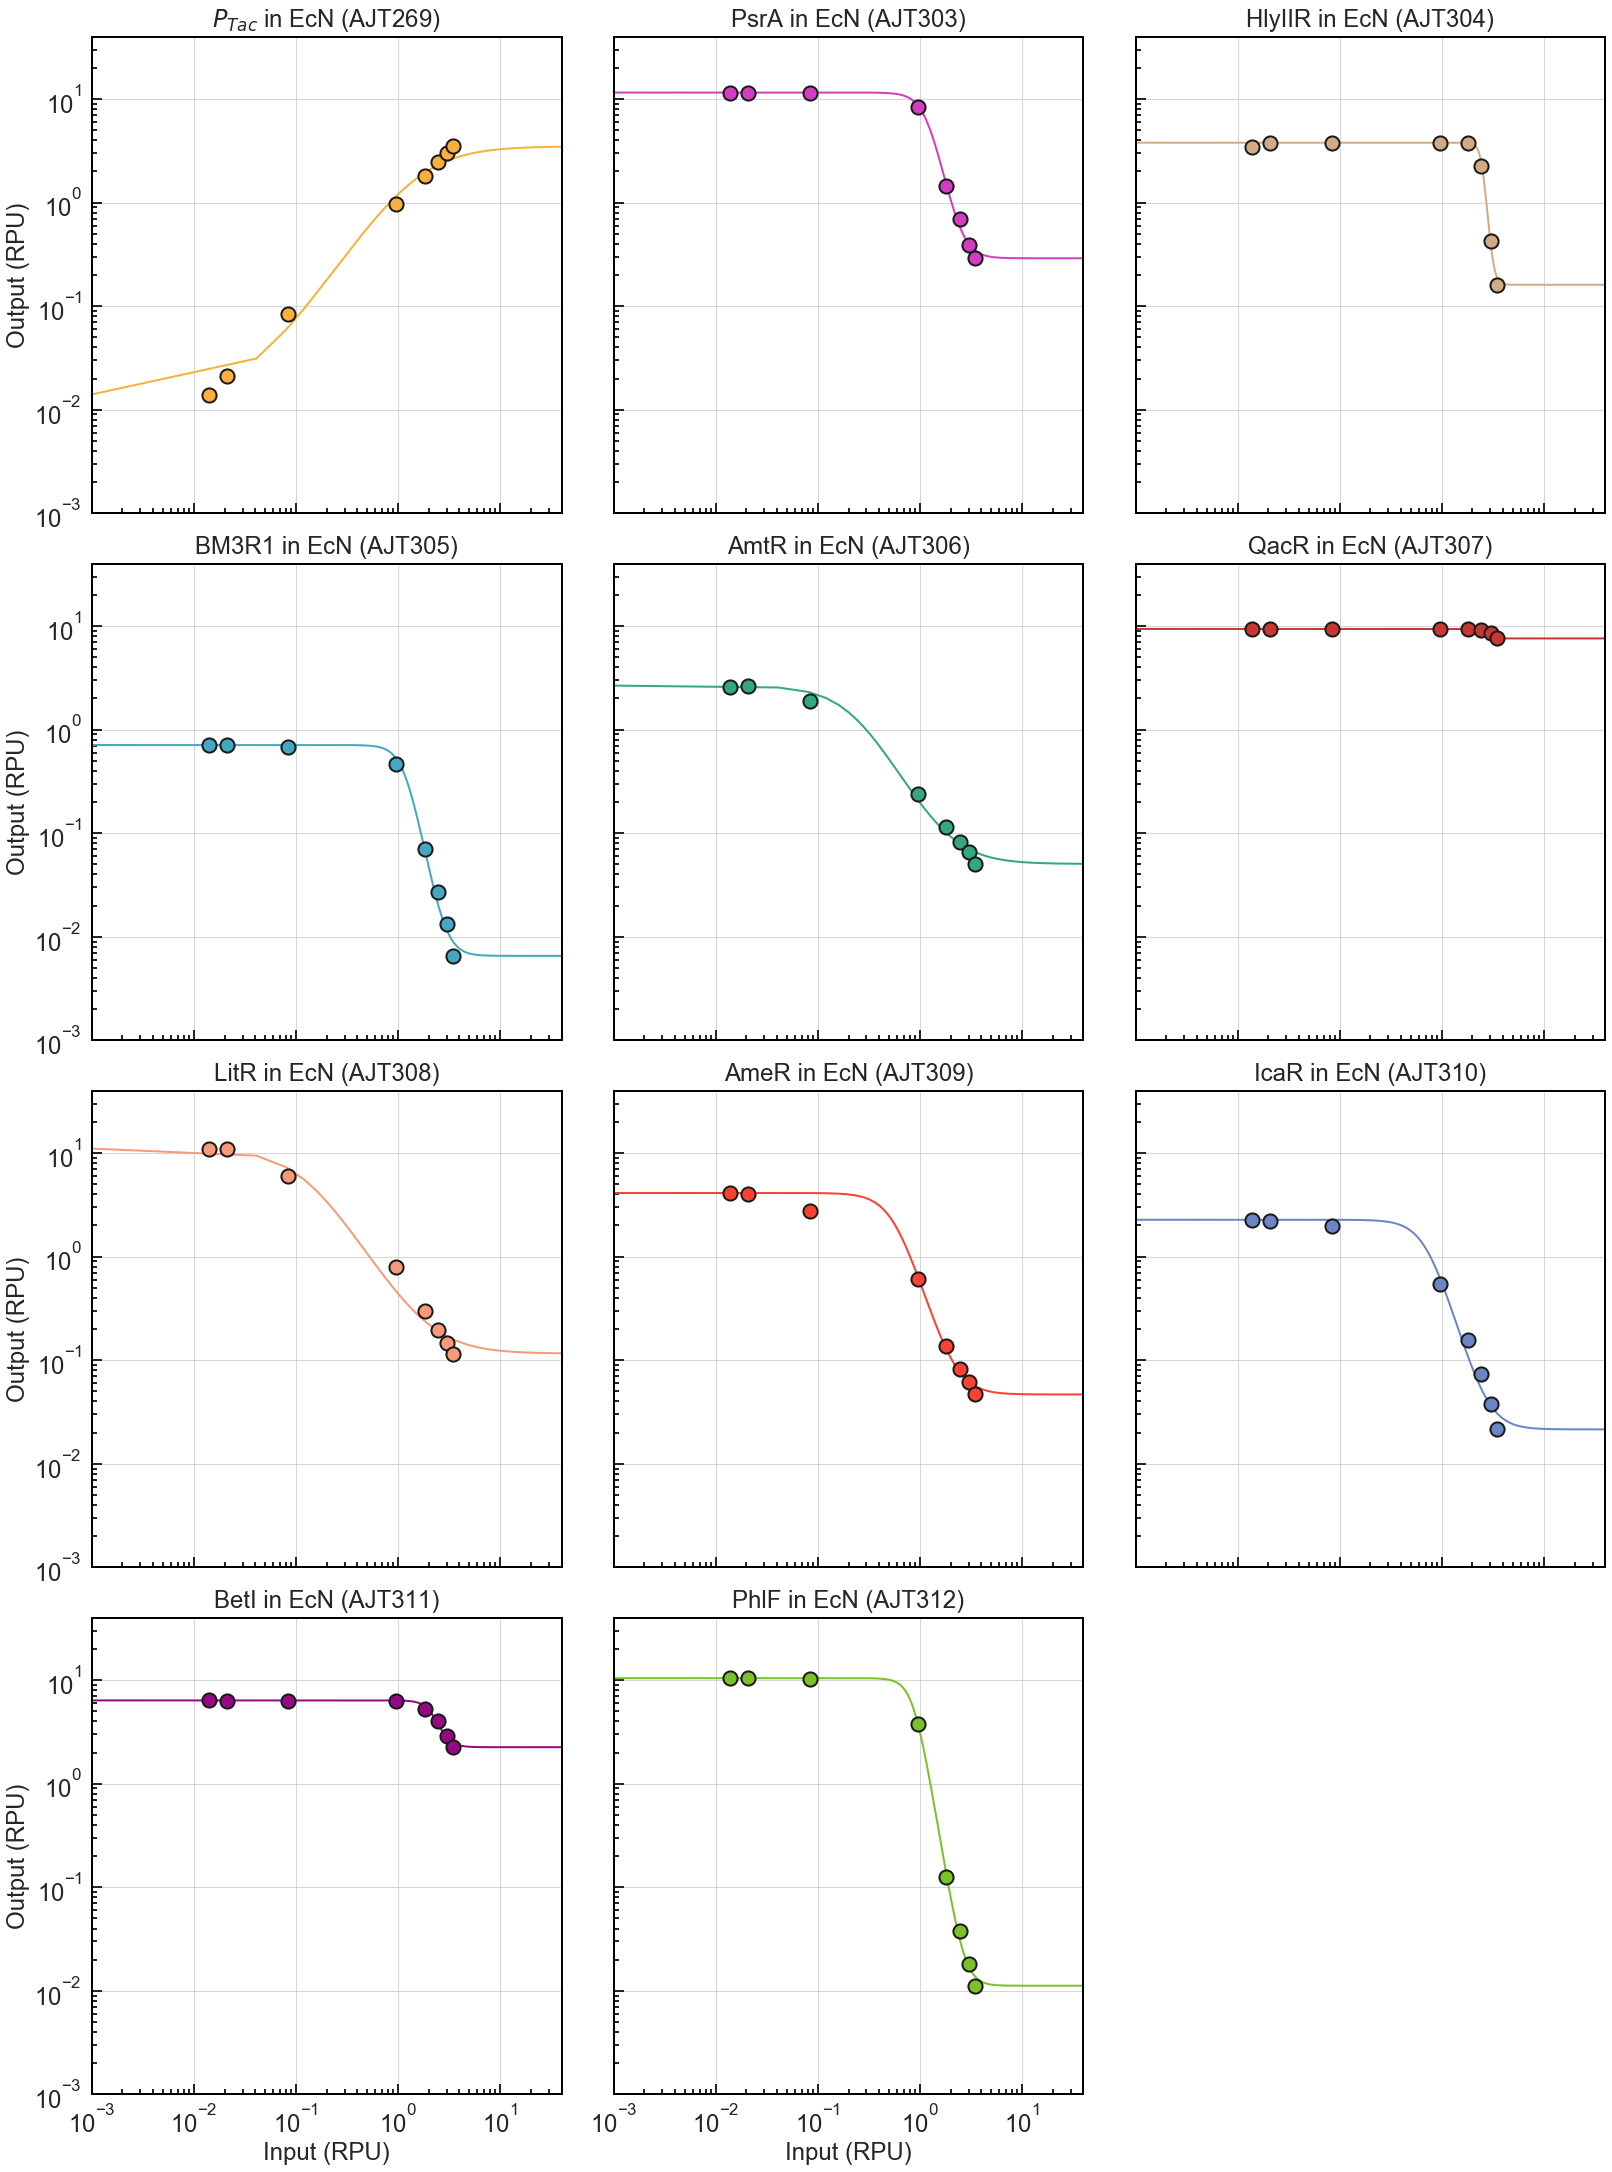

In [58]:
## This one is me making Jai's strategy work with how I already have my data

rows = 4
cols = 3


figRPUxRPU, axRPUxRPU = plt.subplots(rows,cols, figsize=(7.5*cols,7.5*rows), sharey = 'row', sharex = 'col') # row, column format
plt.tight_layout(pad = 4, h_pad = 4, w_pad = 4) #tidies up spacing between plots

tfs_RPUxRPU = dict() # dictionary that eventually contains transfer function information

for m in media:
    tfs_RPUxRPU[m] = dict()
    
    for i in inducers:
        tfs_RPUxRPU[m][i] = dict()
        for p in parent:
            tfs_RPUxRPU[m][i][p] = dict()
            # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if (len(filtered[filtered['strain_num']==s][i].unique())>1 and
                                                     s in filtered[filtered['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later

            for s in strains_subset:
                if s != 'AJT206' and s != 'AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382': # exclude these because I don't need them
#                 strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']                    ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)

                    FP = axRPUxRPU[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']]

                    for spine in FP.spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(2)

                    tfs_RPUxRPU[m][i][p][s] = build_transfer_functions([data_RPU[m][i][p].loc['AJT269'].tolist()], # x data
                                                      [data_RPU[m][i][p].loc[s].tolist()], # y data; needs to be a list for Jai's stuff
                                                      ['{} in {} ({})'.format(strain_info_rep[s]['repressor'], list(filtered[filtered['strain_num']==s]['parent_strain'].unique())[0], s)]) # name of transfer function                
                    ## scatter
                    # have to get data from tfs[m][i] as [0] because it is a list of lists, which in this case is only 1 list
                    # .inputs and .outputs notation is from Jai's script, which creates objects from what was fed to tf builder
                    FP.scatter(tfs_RPUxRPU[m][i][p][s][0].inputs, tfs_RPUxRPU[m][i][p][s][0].outputs,
                                                            s = 200, zorder=2, c = strain_info_rep[s]['color'],
                                                            edgecolors = 'k', linewidths = 2)

                    ## fitting line
                    xvals = np.linspace(.001,40, 1000) # x values for creating smooth line

                    # tfs[m][i][0].hill_eqn(xvals) outputs y values for hill equation at many x values; 
                    # uses fit parameters from build_transfer_functions module above
                    FP.plot(xvals, tfs_RPUxRPU[m][i][p][s][0].hill_eqn(xvals), 
                                                           color = strain_info_rep[s]['color'],
                                                           zorder = 1, linewidth = 2)

                    FP.set_yscale('log')
                    FP.set_xscale('log')
                    if fig_pos[m][s]['fig_col'] == 0:
                        FP.set_ylabel('Output (RPU)', size = 24)
                    if fig_pos[m][s]['fig_row'] == (rows-1):
                        FP.set_xlabel('Input (RPU)'.format(i), size = 24)
                    FP.set_title(tfs_RPUxRPU[m][i][p][s][0].name, size = 24, pad = 10)
                    FP.tick_params(labelsize = 24, length = 10, width = 2, direction = 'in', pad = 10)
                    FP.tick_params(which='minor', length = 5, width = 2, direction = 'in')
                    FP.set_xlim(0.001,40)
                    FP.set_ylim(0.001,40)
                    FP.yaxis.grid(True)
                    FP.xaxis.grid(True)
                    
# gets rid of empty plots
figRPUxRPU.delaxes(axRPUxRPU[3,2]) # zero indexing            

In [59]:
# figRPUxRPU.savefig(fig_dir+'/TransferFunctions_all_RPUxRPU.pdf', bbox_inches = "tight", transparent = True)


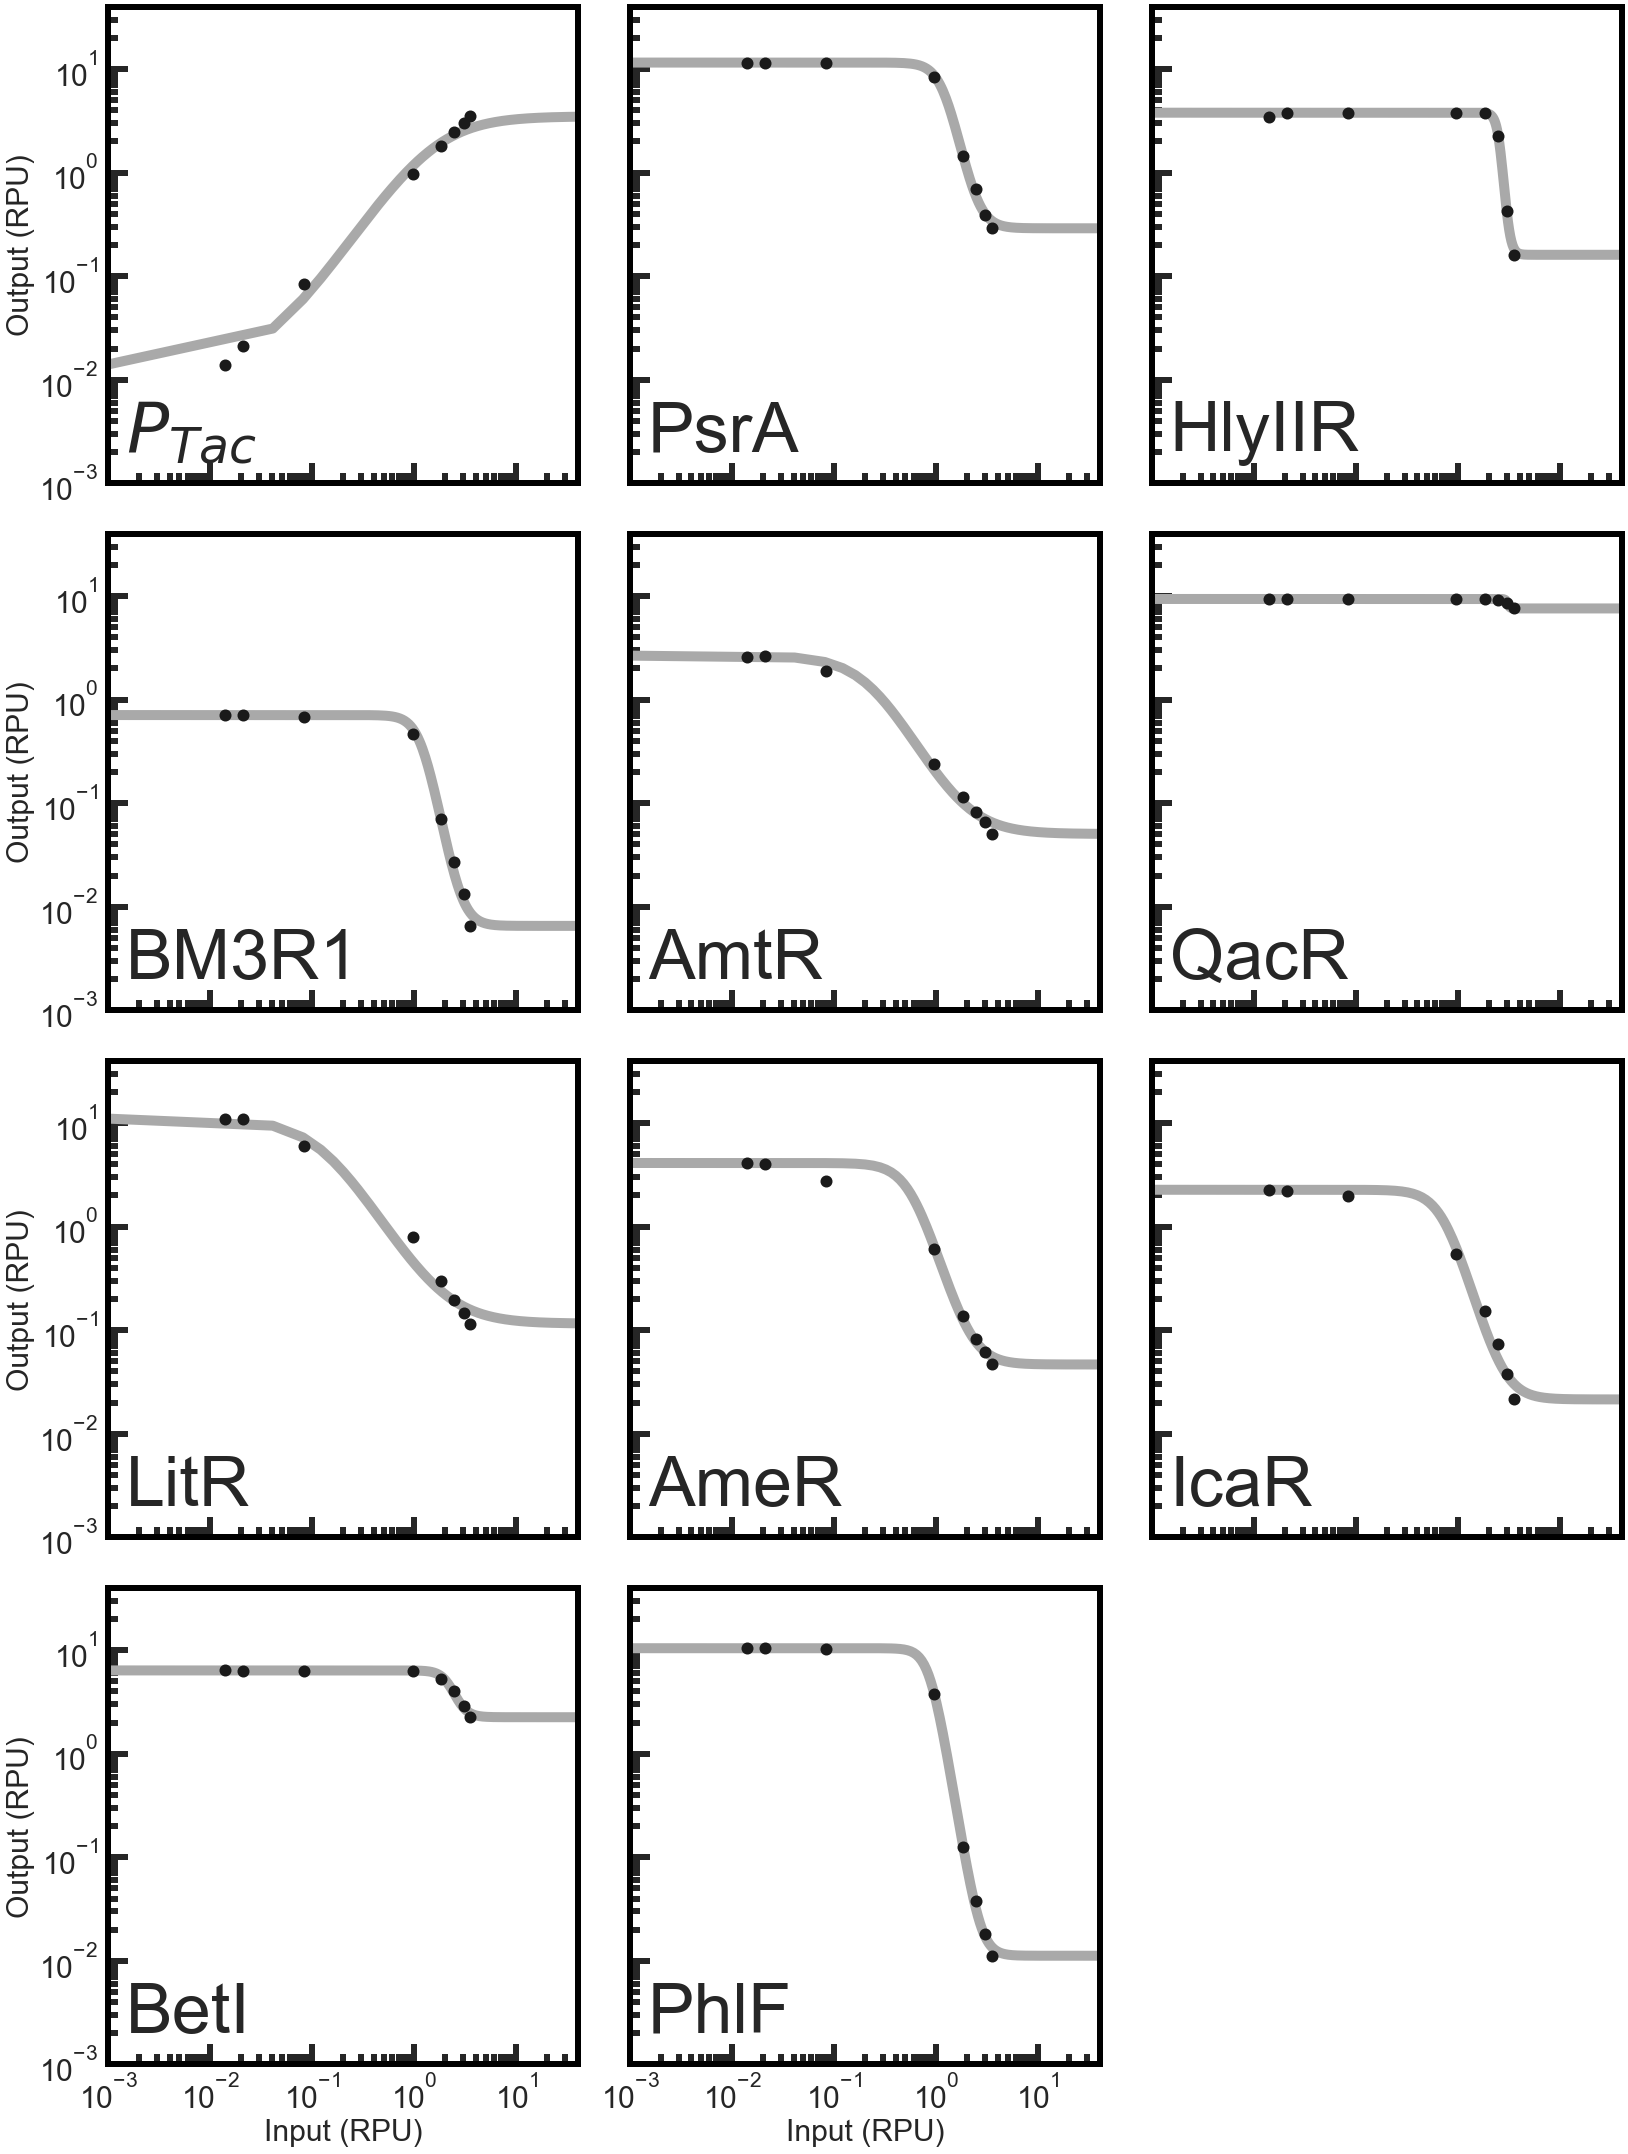

In [62]:
## This one is me making Jai's strategy work with how I already have my data

rows = 4
cols = 3


figRPUxRPU2, axRPUxRPU2 = plt.subplots(rows,cols, figsize=(7.5*cols,7.5*rows), sharey = 'row', sharex = 'col') # row, column format
plt.tight_layout(pad = 4, h_pad = 4, w_pad = 4) #tidies up spacing between plots

tfs_RPUxRPU = dict() # dictionary that eventually contains transfer function information

for m in media:
    tfs_RPUxRPU[m] = dict()
    
    for i in inducers:
        tfs_RPUxRPU[m][i] = dict()
        for p in parent:
            tfs_RPUxRPU[m][i][p] = dict()
            # chose >1 since if never saw other inducer, there should only be 0 as the inducer concentration from conditions file
            strains_subset = [s for s in strains if (len(filtered[filtered['strain_num']==s][i].unique())>1 and
                                                     s in filtered[filtered['parent_strain']==p]['strain_num'].unique())] # need to separate this way for subtracting autfluorescence later

            for s in strains_subset:
                if s != 'AJT206' and s != 'AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382': # exclude these because I don't need them
#                 strains_subset = [s for s in strains if s!='AJT206' and s!='AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382']                    ## make borders black (https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib)

                    FP = axRPUxRPU2[fig_pos[m][s]['fig_row']][fig_pos[m][s]['fig_col']]

                    for spine in FP.spines.values():
                        spine.set_edgecolor('black')
                        spine.set_linewidth(6)

                    tfs_RPUxRPU[m][i][p][s] = build_transfer_functions([data_RPU[m][i][p].loc['AJT269'].tolist()], # x data
                                                      [data_RPU[m][i][p].loc[s].tolist()], # y data; needs to be a list for Jai's stuff
                                                      ['{} in {} ({})'.format(strain_info_rep[s]['repressor'], list(filtered[filtered['strain_num']==s]['parent_strain'].unique())[0], s)]) # name of transfer function                
                    ## scatter
                    # have to get data from tfs[m][i] as [0] because it is a list of lists, which in this case is only 1 list
                    # .inputs and .outputs notation is from Jai's script, which creates objects from what was fed to tf builder
                    FP.scatter(tfs_RPUxRPU[m][i][p][s][0].inputs, tfs_RPUxRPU[m][i][p][s][0].outputs,
                                                            s = 100, zorder=2, c = 'k',
                                                            edgecolors = 'k', linewidths = 2)

                    ## fitting line
                    xvals = np.linspace(.001,40, 1000) # x values for creating smooth line

                    # tfs[m][i][0].hill_eqn(xvals) outputs y values for hill equation at many x values; 
                    # uses fit parameters from build_transfer_functions module above
                    FP.plot(xvals, tfs_RPUxRPU[m][i][p][s][0].hill_eqn(xvals), 
                                                           color = strain_info_rep[s]['color'],
                                                           zorder = 1, linewidth = 10)

                    FP.set_yscale('log')
                    FP.set_xscale('log')
                    if fig_pos[m][s]['fig_col'] == 0:
                        FP.set_ylabel('Output (RPU)', size = 30)
                    if fig_pos[m][s]['fig_row'] == (rows-1):
                        FP.set_xlabel('Input (RPU)', size = 30)
#                     FP.set_title(tfs_RPUxRPU[m][i][p][s][0].name, size = 30, pad = 10)
                    FP.tick_params(labelsize = 30, length = 20, width = 6, direction = 'in', pad = 10)
                    FP.tick_params(which='minor', length = 10, width = 6, direction = 'in')
                    FP.set_xlim(0.001,40)
                    FP.set_ylim(0.001,40)
                    FP.yaxis.grid(False)
                    FP.xaxis.grid(False)
                    
                    FP.text(0.0015, 0.0015 , strain_info_rep[s]['repressor'], 
                                                  verticalalignment = 'bottom', horizontalalignment = 'left', 
                                                  fontsize = 70)

# gets rid of empty plots
figRPUxRPU2.delaxes(axRPUxRPU2[3,2]) # zero indexing            

In [63]:
# figRPUxRPU2.savefig(fig_dir+'/TransferFunctions_all_RPUxRPU_CAVstyle.pdf', bbox_inches = "tight", transparent = True)


## Hill function output parameters

The following is used for repression equations. x^n goes in the numerator instead of K^n for activation.<br/><br/>
y = promoter activity in RPU<br/>
x = concentration of small molecule<br/>
ymin = leakiness<br/>
K = threshold (sensitivity)<br/>
n = cooperativity

$$ y = y_{min} + (y_{max} - y_{min}) * \frac{K^n}{K^n + x^n}$$

In [64]:
hill_params = dict()
hill_params_df = dict()

for m in media:
    hill_params[m] = dict()
    hill_params_df[m] = dict()
    for i in inducers:
        hill_params[m][i] = dict()
        hill_params_df[m][i] = dict()
        for p in parent:
            hill_params[m][i][p] = dict()
            strains_subset = [s for s in strains if s!= 'AJT206' and s!= 'AJT280' and s!='AJT361' and s!='AJT362' and s!='AJT374' and s!='AJT382'] # exclude these because I don't need them
            for s in strains_subset:
                hill_params[m][i][p][s] = ({'Repressor': strain_info_rep[s]['repressor'],
                             'Max inducer (uM)': round(max(tfs_RPUxRPU[m][i][p][s][0].inputs), 1),
                             'ymax (RPU)' : round(max(tfs_RPUxRPU[m][i][p][s][0].outputs),1),
                             'ymin (RPU * 10^-3)' : round(min(tfs_RPUxRPU[m][i][p][s][0].outputs)/(1*10**-3),1),
                             'K (uM)': round(tfs_RPUxRPU[m][i][p][s][0].kd, 1), 
                             'n': round(tfs_RPUxRPU[m][i][p][s][0].n, 1),
                             'fold-change': round((max(tfs_RPUxRPU[m][i][p][s][0].outputs))/(min(tfs_RPUxRPU[m][i][p][s][0].outputs)),1)})
            hill_params_df[m][i][p] = pd.DataFrame.from_dict(hill_params[m][i][p], orient = 'index')

In [65]:
hill_params_df['M9']['iptg']['EcN']

,Repressor,Max inducer (uM),ymax (RPU),ymin (RPU * 10^-3),K (uM),n,fold-change
AJT269,$P_{Tac}$,3.5,3.5,14.0,1.6,-1.5,250.1
AJT303,PsrA,3.5,11.5,289.7,1.2,4.9,39.8
AJT304,HlyIIR,3.5,3.8,160.7,2.5,15.0,23.5
AJT305,BM3R1,3.5,0.7,6.5,1.2,5.2,108.4
AJT306,AmtR,3.5,2.7,50.5,0.2,1.9,52.7
AJT307,QacR,3.5,9.4,7586.0,3.1,36.8,1.2
AJT308,LitR,3.5,11.0,115.9,0.1,1.6,95.3
AJT309,AmeR,3.5,4.1,46.7,0.6,3.3,88.1
AJT310,IcaR,3.5,2.3,21.5,0.7,3.5,105.6
AJT311,BetI,3.5,6.4,2250.5,2.3,6.7,2.8
